# Exploratory Data Analysis (EDA)

O objetivo é analisar a estrutura dos dados e criar ums primeira fotografia dos dados.

## Load libs

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from datetime import datetime
import pytz


## Load the dataset 

In [3]:
df = pd.read_csv('private_company_product_review_dataset.csv')
df.head(3)

,Unnamed: 0,review_id,review_datetime,product_id,product_name,product_brand_name,product_category_l1,product_category_l2,review_comment_title,review_comment_text,review_rate,review_recommend_to_a_friend,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_brazilian_state
0,0,00003a66-56db-4974-a70c-54506b7900e3,2021-05-10T10:00:01Z,113784,Kit 3 Em 1 Descascador Cortador Modelador Frut...,NaN,Beleza e Perfumaria,Cabelo,Gostei muito do produto .,Entrega super rápida . Parabéns pela agilida...,5,Yes,6c3872c4-031f-40b3-a652-8566b36b01d4,1952.0,M,Rio de Janeiro
1,1,00005dc4-7f7c-42bb-93bb-9c22981c1288,2021-04-20T05:57:09Z,101682,Relógio Casio G-Shock Masculino DW-9052GBX-1A9DR,NaN,Relógios,Relógios de Pulso,Não entregue,O produto não foi entregue e após um mês da co...,1,No,b9f99932-a41f-47f3-b002-4546e07b35dd,1992.0,F,Paraná
2,2,000120f1-1b5d-4c4b-b082-9299c092d648,2021-05-14T17:08:03Z,116516,Relógio Casio Feminino Ltp-V002gl-9budf,NaN,Relógios,Relógios,O Relógio não funciona,A minha esposa foi acerta o relógio e não func...,1,No,9f6d9901-fb0f-4aeb-a068-a0888cb1f724,1956.0,M,Distrito Federal


In [4]:
# Remove the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)
df.head(1)

,review_id,review_datetime,product_id,product_name,product_brand_name,product_category_l1,product_category_l2,review_comment_title,review_comment_text,review_rate,review_recommend_to_a_friend,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_brazilian_state
0,00003a66-56db-4974-a70c-54506b7900e3,2021-05-10T10:00:01Z,113784,Kit 3 Em 1 Descascador Cortador Modelador Frut...,NaN,Beleza e Perfumaria,Cabelo,Gostei muito do produto .,Entrega super rápida . Parabéns pela agilida...,5,Yes,6c3872c4-031f-40b3-a652-8566b36b01d4,1952.0,M,Rio de Janeiro


# EDA
Análise exploratória dos dados como uma fotografia dos dados, identificando valores ausentes, estatísticas descritivas, e a distribuição dos dados.

In [6]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142400 entries, 0 to 142399
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     142400 non-null  object 
 1   review_datetime               142400 non-null  object 
 2   product_id                    142400 non-null  int64  
 3   product_name                  132207 non-null  object 
 4   product_brand_name            40958 non-null   object 
 5   product_category_l1           142063 non-null  object 
 6   product_category_l2           128284 non-null  object 
 7   review_comment_title          142098 non-null  object 
 8   review_comment_text           137550 non-null  object 
 9   review_rate                   142400 non-null  int64  
 10  review_recommend_to_a_friend  142382 non-null  object 
 11  reviewer_id                   142400 non-null  object 
 12  reviewer_birth_year          

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
review_id                            0
review_datetime                      0
product_id                           0
product_name                     10193
product_brand_name              101442
product_category_l1                337
product_category_l2              14116
review_comment_title               302
review_comment_text               4850
review_rate                          0
review_recommend_to_a_friend        18
reviewer_id                          0
reviewer_birth_year               5981
reviewer_gender                   4135
reviewer_brazilian_state          3990
dtype: int64


## Série temporal

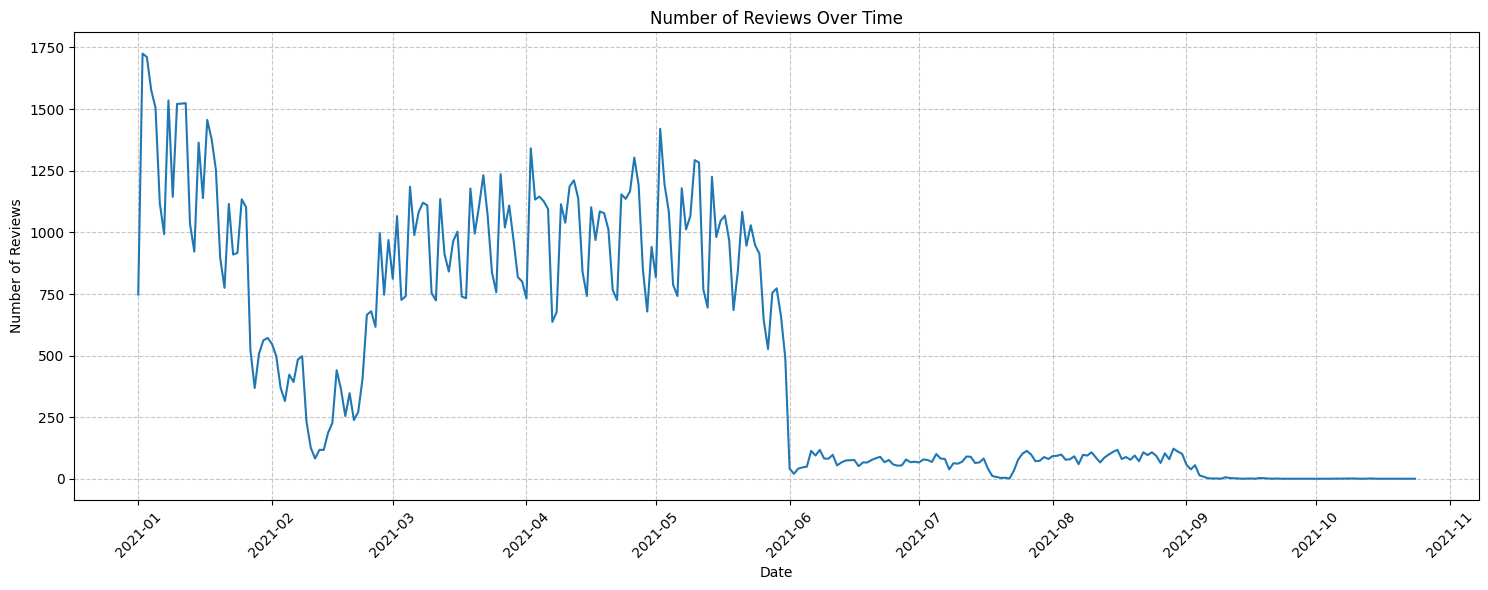

Date range: from 2021-01-01 to 2021-10-24
Total number of days: 276
Average number of reviews per day: 515.94
Maximum number of reviews in a day: 1725 (on 2021-01-02)


In [11]:
# Convert review_datetime to datetime type
df['review_datetime'] = pd.to_datetime(df['review_datetime'])

# Group by date and count the number of reviews
daily_reviews = df.groupby(df['review_datetime'].dt.date).size().reset_index(name='count')

# Sort by date
daily_reviews = daily_reviews.sort_values('review_datetime')

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(daily_reviews['review_datetime'], daily_reviews['count'])

# Customize the plot
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Print some statistics
print(f"Date range: from {daily_reviews['review_datetime'].min()} to {daily_reviews['review_datetime'].max()}")
print(f"Total number of days: {len(daily_reviews)}")
print(f"Average number of reviews per day: {daily_reviews['count'].mean():.2f}")
print(f"Maximum number of reviews in a day: {daily_reviews['count'].max()} (on {daily_reviews.loc[daily_reviews['count'].idxmax(), 'review_datetime']})")

A distribuição dos dados no tempo mostra características importantes do dataset. Os dados 
a partir do final de **junho de 2021** tem uma queda brusca e serão desconsiderados para uma análise mais precisa.

In [14]:
# Ensure that the 'review_datetime' column is in datetime format with UTC timezone
df['review_datetime'] = pd.to_datetime(df['review_datetime'], utc=True)

# Create a cutoff date (June 1, 2021) with UTC timezone
cutoff_date = datetime(2021, 6, 1, tzinfo=pytz.UTC)

# Filter the dataframe to keep only the data before the cutoff date
df_filtered = df[df['review_datetime'] < cutoff_date]

# Print the shape of the original and filtered dataframes to see how many rows were removed
print(f"Original dataframe shape: {df.shape}")
print(f"Filtered dataframe shape: {df_filtered.shape}")

# Calculate the percentage of data removed
percentage_removed = (1 - len(df_filtered) / len(df)) * 100
print(f"Percentage of data removed: {percentage_removed:.2f}%")

# Update the original dataframe if you want to work with the filtered data from now on
df = df_filtered

# Optionally, you can reset the index of the filtered dataframe
df = df.reset_index(drop=True)

# Print the date range of the filtered dataset
print(f"Date range of filtered dataset: from {df['review_datetime'].min()} to {df['review_datetime'].max()}")

Original dataframe shape: (142400, 15)
Filtered dataframe shape: (135187, 15)
Percentage of data removed: 5.07%
Date range of filtered dataset: from 2021-01-01 00:11:28+00:00 to 2021-05-31 23:50:33+00:00


Agora vamos plotar novamente

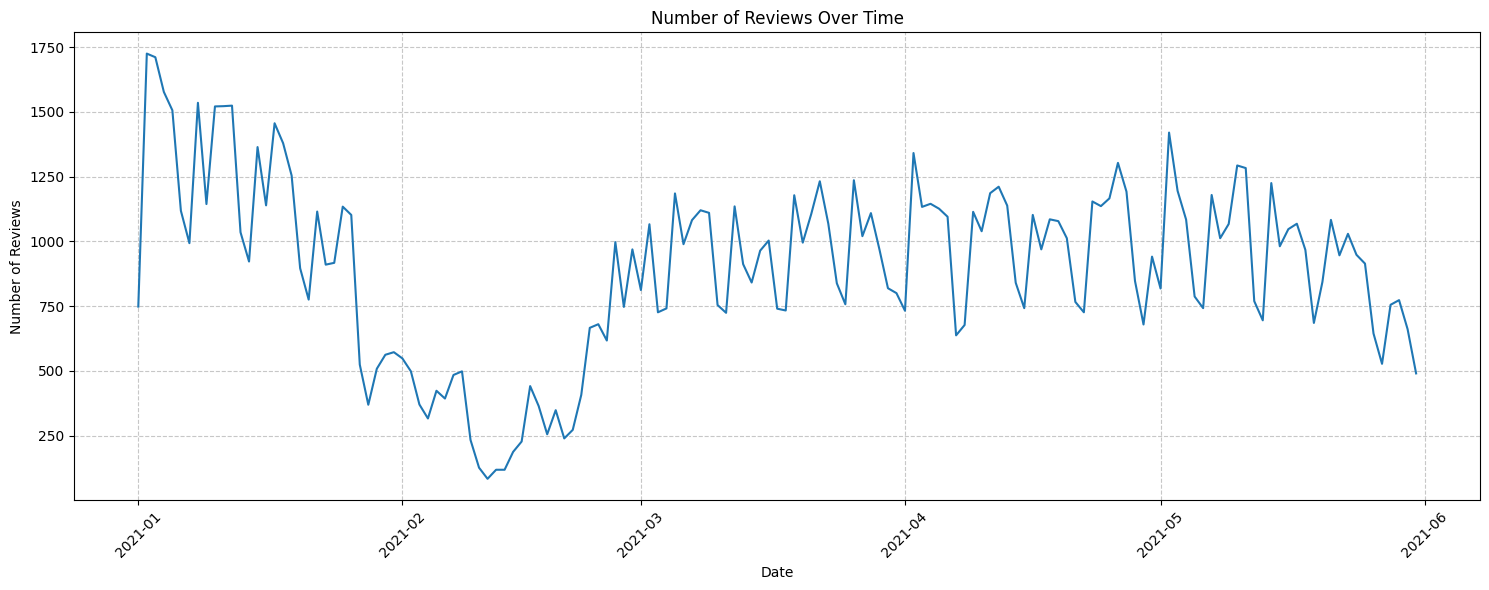

Date range: from 2021-01-01 to 2021-05-31
Total number of days: 151
Average number of reviews per day: 895.28
Maximum number of reviews in a day: 1725 (on 2021-01-02)


In [15]:
# Convert review_datetime to datetime type
df['review_datetime'] = pd.to_datetime(df['review_datetime'])

# Group by date and count the number of reviews
daily_reviews = df.groupby(df['review_datetime'].dt.date).size().reset_index(name='count')

# Sort by date
daily_reviews = daily_reviews.sort_values('review_datetime')

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(daily_reviews['review_datetime'], daily_reviews['count'])

# Customize the plot
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Print some statistics
print(f"Date range: from {daily_reviews['review_datetime'].min()} to {daily_reviews['review_datetime'].max()}")
print(f"Total number of days: {len(daily_reviews)}")
print(f"Average number of reviews per day: {daily_reviews['count'].mean():.2f}")
print(f"Maximum number of reviews in a day: {daily_reviews['count'].max()} (on {daily_reviews.loc[daily_reviews['count'].idxmax(), 'review_datetime']})")

A princípio podemos assumir que o maior volume de dados em janeiro diz respeito às comparas
de fim de ano, enquanto a diminuição em fevereiro pode ser resultado da diminuição das compras realizadas em fevereiro por conta de outros gastos.

Como podemos ver em matéria do Valor Econômico houve uma queda no varejo em fevereiro de 2021.
![Gráfico do Valor Econômico](valor-econ-varejo-20-21.webp)
[url da matéria](https://www.google.com.br/imgres?q=varejo%20fevereiro%202021&imgurl=https%3A%2F%2Fs2-valor.glbimg.com%2FzvGcIVW-FgNBhwlepfgGq2cXR5Y%3D%2F0x0%3A756x473%2F984x0%2Fsmart%2Ffilters%3Astrip_icc()%2Fi.s3.glbimg.com%2Fv1%2FAUTH_63b422c2caee4269b8b34177e8876b93%2Finternal_photos%2Fbs%2F2022%2F1%2Fx%2Fqc3mdUTlGMMUkop683XQ%2Farte08emp-102-varejo-b5.jpg&imgrefurl=https%3A%2F%2Fvalor.globo.com%2Fempresas%2Fnoticia%2F2022%2F02%2F08%2Fvarejo-tem-vendas-fracas-no-inicio-do-ano.ghtml&docid=FK_zMAGpf1eYYM&tbnid=Rpxw_m8hT-QXpM&vet=12ahUKEwjk4pL6s96JAxXvr5UCHQqzH9kQM3oECG0QAA..i&w=984&h=616&hcb=2&ved=2ahUKEwjk4pL6s96JAxXvr5UCHQqzH9kQM3oECG0QAA)



## Distribuição por estado

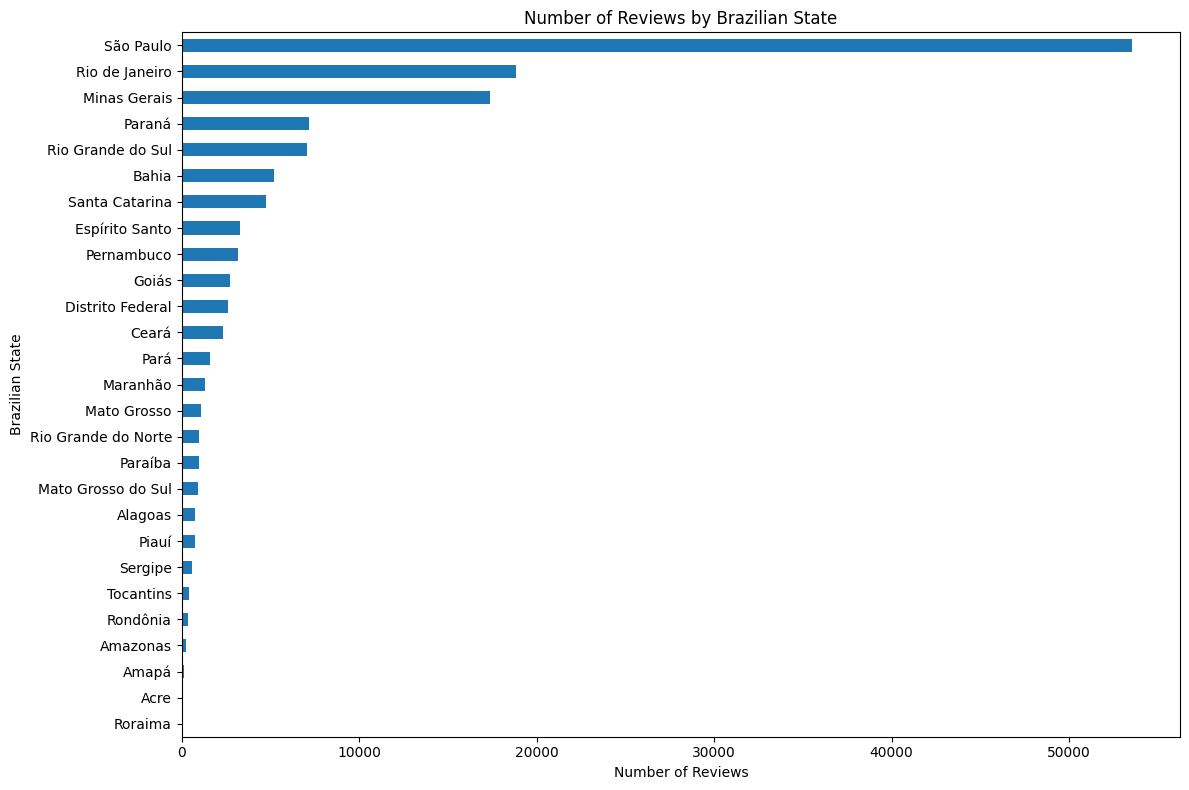

In [26]:
# Count the number of reviews for each state
state_counts = df['reviewer_brazilian_state'].value_counts().sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(12, 8))
state_counts.plot(kind='barh')
plt.title('Number of Reviews by Brazilian State')
plt.xlabel('Number of Reviews')
plt.ylabel('Brazilian State')
plt.tight_layout()
plt.show()

## Categorias

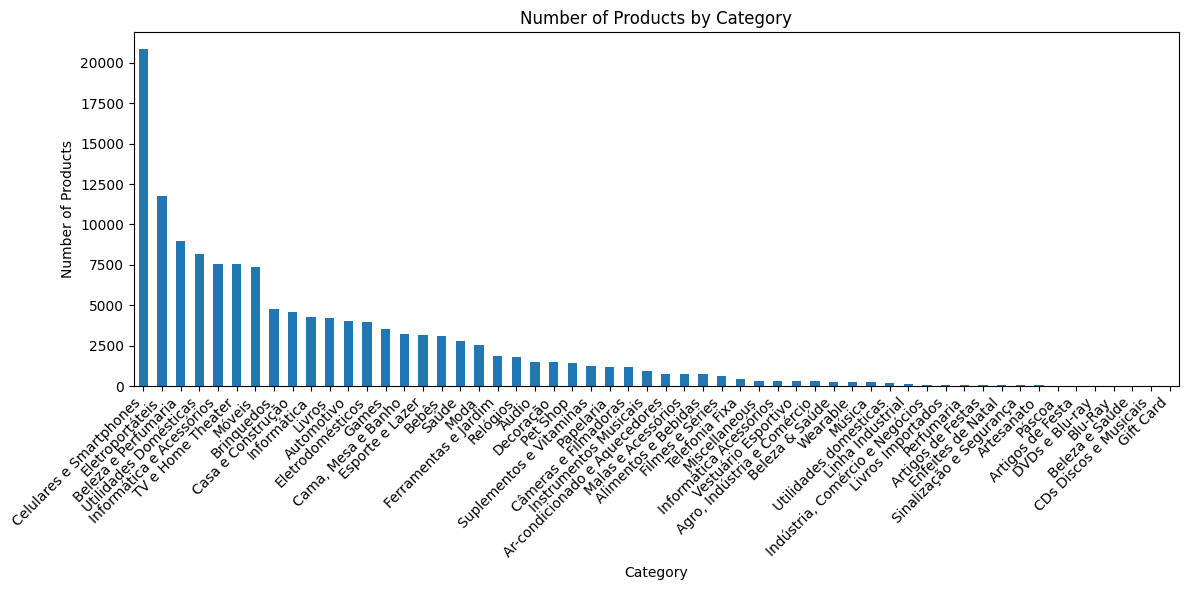

In [16]:
# Count the occurrences of each category
category_counts = df['product_category_l1'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')

# Customize the plot
plt.title('Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

### Distribuição das categorias
A diferença do volume de dados entre as categorias é importante para identificar quais categorias são mais ou menos relevantes para o modelo de aprendizado de máquina.

Para uma análise mais profunda, podemos explorar os dados por categoria para identificar tendências e relacionamentos entre as variáveis. Podemos desenhar um processo básico a partir de algumas das 
categorias mais volumosas.

## Avaliações

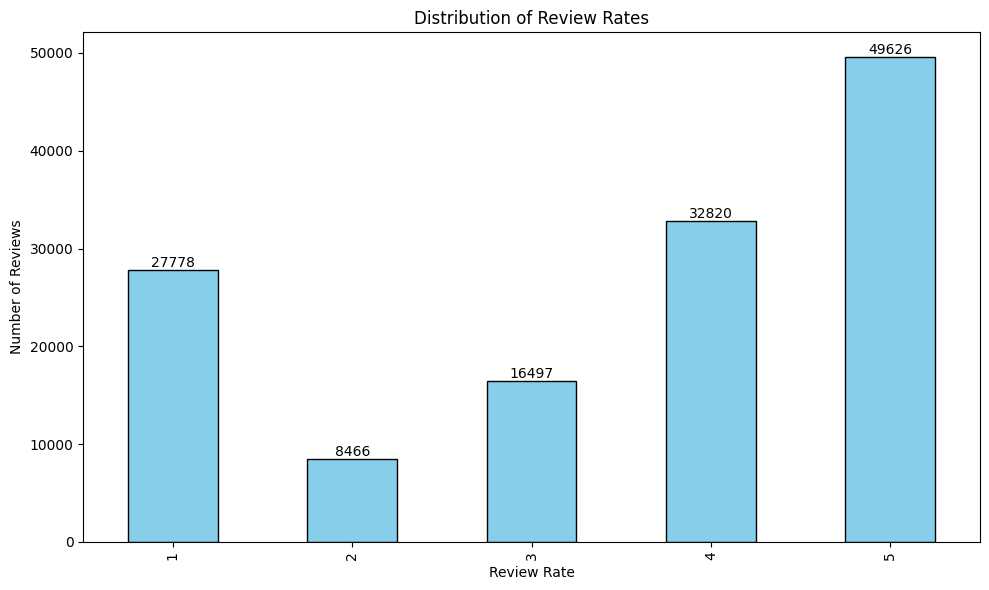

In [17]:
# Count the occurrences of each review rate
rate_counts = df['review_rate'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
rate_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Review Rates')
plt.xlabel('Review Rate')
plt.ylabel('Number of Reviews')
plt.xticks(range(5), ['1', '2', '3', '4', '5'])  # Ensure all rates from 1 to 5 are shown

# Add value labels on top of each bar
for i, v in enumerate(rate_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

### Distribuição por avaliações

Em rates de 1 a 5 há uma tendência de que os reviews se acumulem nas pontas (valores 1 e 5).
Em termos de gestão de crise é importante identificar quais os prinsipais motivos para as notas *1*,
mas uma análise qualitativa das categorias 2, 3 e 4 pode trazer informações mais ricas.

/var/folders/78/wfznbsjs5qx4dz0yv13kph5m0000gn/T/ipykernel_89168/1298683048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['review_rate'] = df_clean['review_rate'].astype(int)


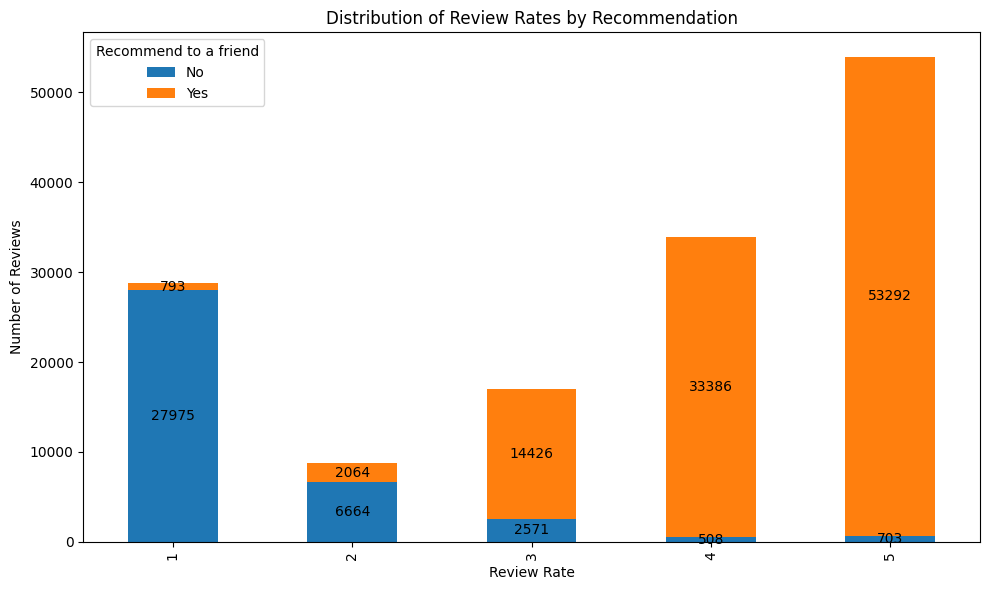

In [29]:
# Remove null values from 'review_recommend_to_a_friend' and 'review_rate'
df_clean = df.dropna(subset=['review_recommend_to_a_friend', 'review_rate'])

# Convert 'review_rate' to integer type
df_clean['review_rate'] = df_clean['review_rate'].astype(int)

# Group the data
grouped = df_clean.groupby(['review_rate', 'review_recommend_to_a_friend']).size().unstack()

# Create the stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Distribution of Review Rates by Recommendation')
plt.xlabel('Review Rate')
plt.ylabel('Number of Reviews')
plt.xticks(range(5), ['1', '2', '3', '4', '5'])
plt.legend(title='Recommend to a friend', labels=['No', 'Yes'])

# Add value labels on top of each bar
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.tight_layout()

# Show the plot
plt.show()


## Anális por categoria


--- Analysis for category: Beleza e Perfumaria ---
Number of reviews: 8959
Average rating: 3.52

Top 5 products by number of reviews:
product_name
Kit Aparador de Pelos Philips Multigroom QG3339/15 Bateria Recarregável 12W    219
Chapinha Prancha Profissional Nano Titanium 1 1/4 Até 450ºF - Bivolt           169
Escova Soft Brush 1000W - Philco                                               130
Prancha Chapinha Nano Titanium 450 °F                                          125
Depilador Elétrico Philips Satinelle HP6403/30                                 118
Name: count, dtype: int64


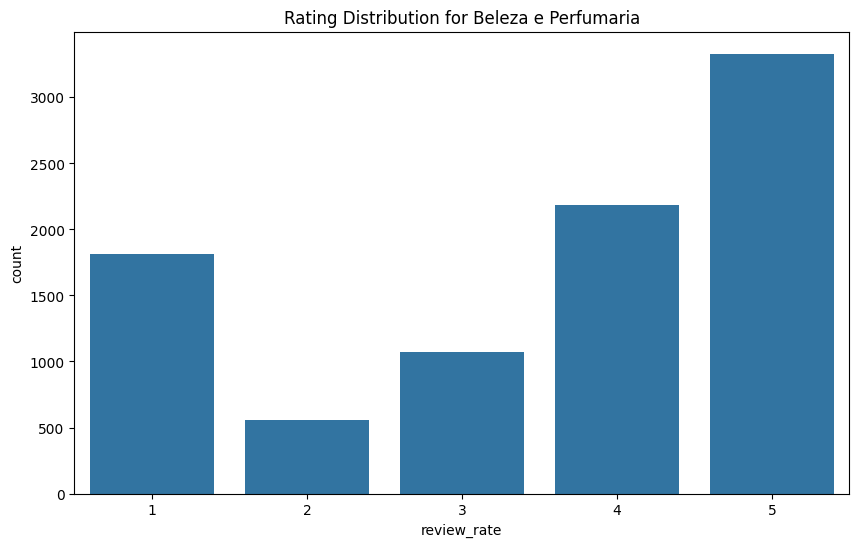

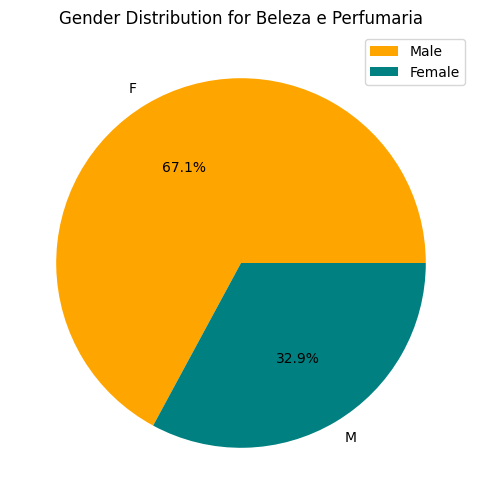


--- Analysis for category: Relógios ---
Number of reviews: 2429
Average rating: 3.62

Top 5 products by number of reviews:
product_name
Relógio Feminino Casio Vintage Digital Fashion A168WA-1WDF          25
Relógio Masculino Casio Digital Esportivo A158WA-1DF                24
Relógio Feminino Casio Vintage Digital Fashion A159WA-N1DF          24
Relógio Invicta Pro Driver Dourado Masculino - 0074                 21
Relógio Invicta Masculino 0072 Pro Diver 48mm Banhado a Ouro 18k    20
Name: count, dtype: int64


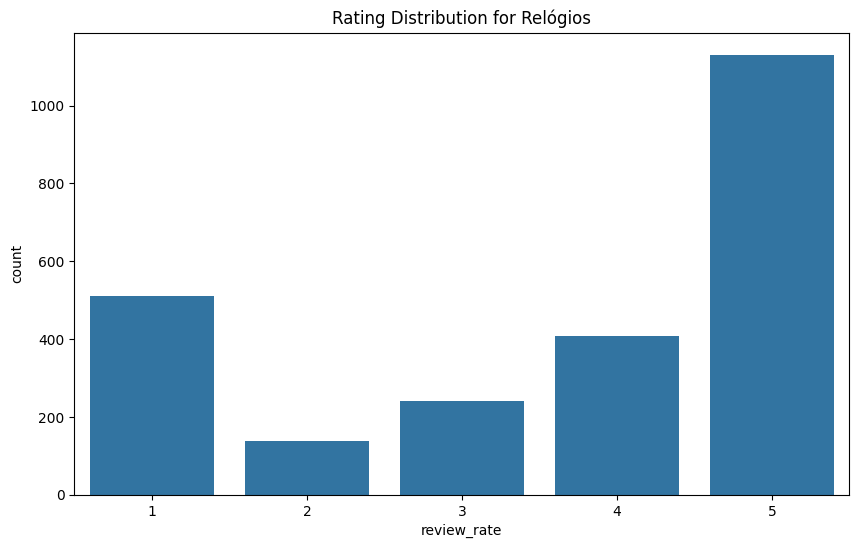

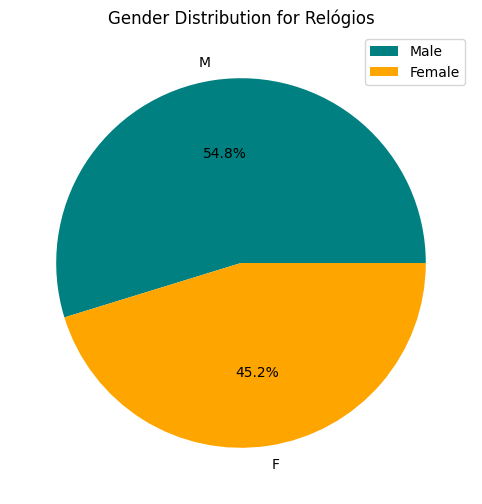


--- Analysis for category: Eletroportáteis ---
Number of reviews: 11786
Average rating: 3.78

Top 5 products by number of reviews:
product_name
Aspirador de Pó Philco Rapid 1000N Vermelho/Preto - 1000W            756
Cafeteira Elétrica Cadence Single CAF111 com 2 Xícaras - Vermelho    248
Pipoqueira Elétrica Britania Pop Time VM                             243
Liquidificador Philco PH900 2L 12 Velocidades Vermelho - 900W        243
Fritadeira Philco Air Fry Saúde Inox PH 3 Litros Vermelho            229
Name: count, dtype: int64


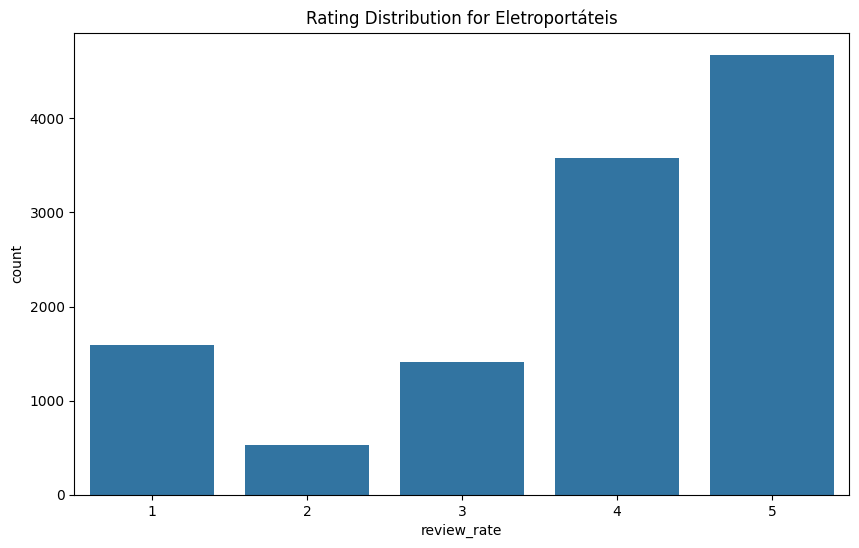

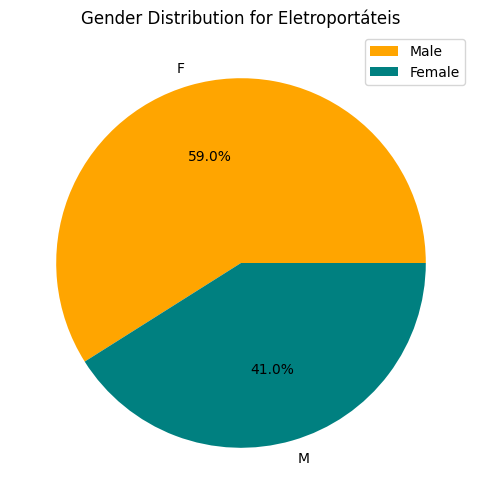


--- Analysis for category: Games ---
Number of reviews: 3581
Average rating: 3.54

Top 5 products by number of reviews:
product_name
Game God Of War - PS4                                         292
Game FIFA 18 - Xbox 360                                        85
Game Pro Evolution Soccer 2018 - Xbox360                       67
Game Grand Theft Auto V - Xbox 360                             62
Live Card Microsoft Gold 12 Meses para Xbox 360 e Xbox One     39
Name: count, dtype: int64


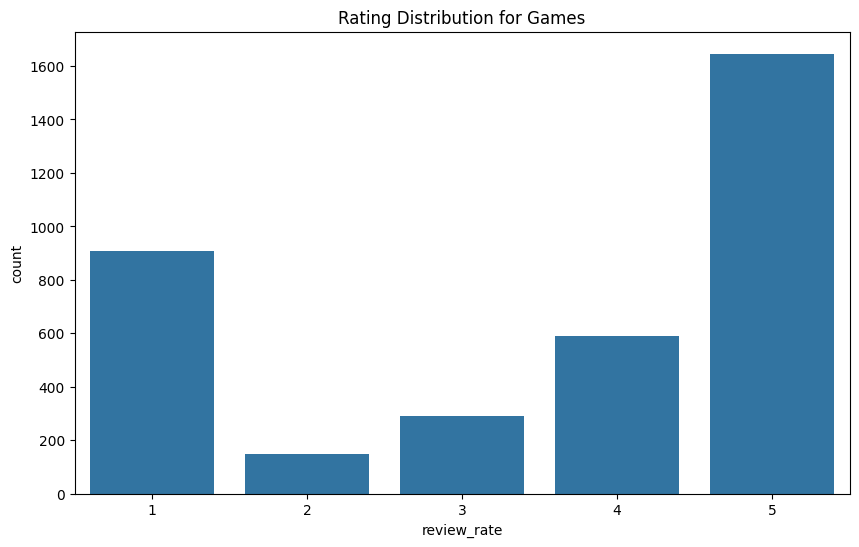

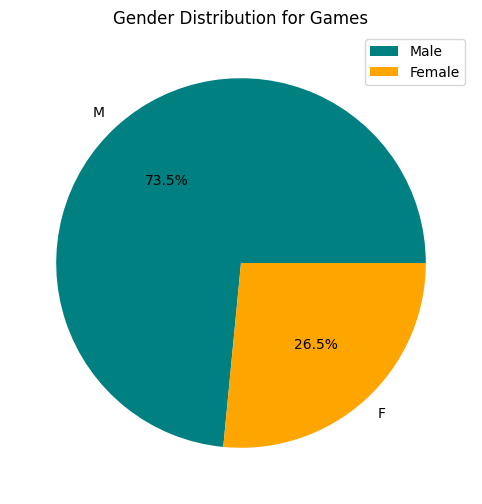


--- Analysis for category: TV e Home Theater ---
Number of reviews: 7556
Average rating: 3.65

Top 5 products by number of reviews:
product_name
Smart TV LED 32" Samsung 32J4300 HD com Conversor Digital 2 HDMI 1 USB Wi-Fi 120Hz                                                     499
Smart TV LED 43" Samsung 43MU6100 UHD 4K HDR Premium com Conversor Digital 3 HDMI 2 USB 120Hz                                          346
Smart TV LED 32'' Semp Toshiba TCL 32L2600 HD com Conversor Digital 3 HDMI 2 USB Wi-Fi                                                 323
Smart TV LED 39" Philco PH39N86DSGW HD com Conversor Digital 3 HDMI 1 USB Wi-Fi Closed Caption e Sleep timer                           321
Smart TV LED 58" Samsung 58mu6120 Ultra HD 4K com Conversor Digital Integrado 3 HDMI 2 USB Wi-Fi  Smart Tizen, Espelhamento de Tela    297
Name: count, dtype: int64


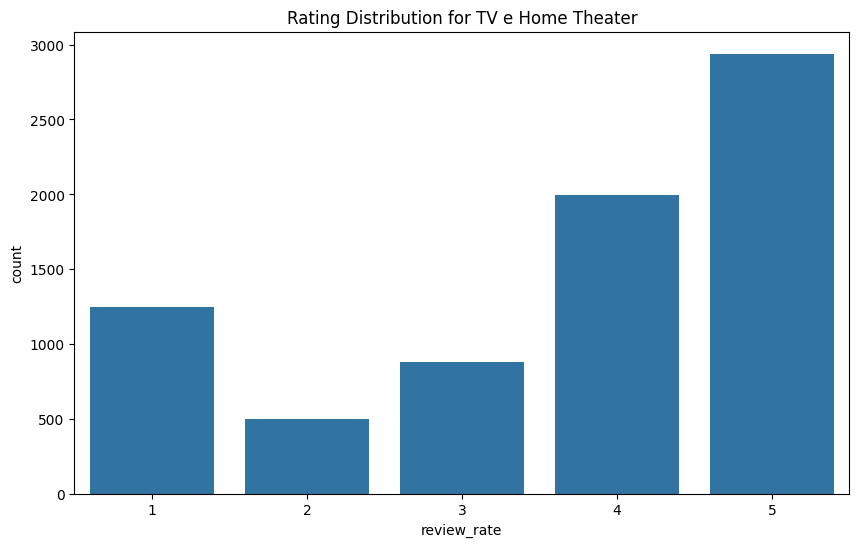

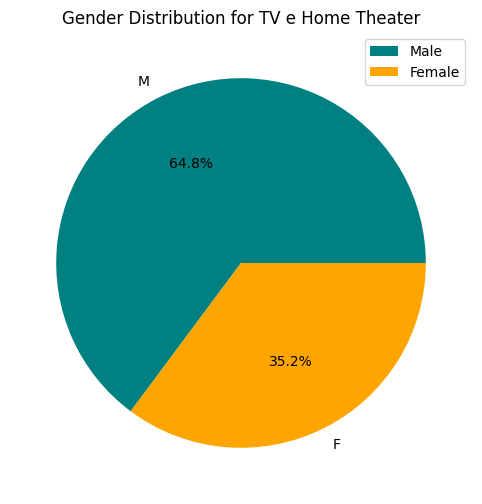


--- Analysis for category: Utilidades Domésticas ---
Number of reviews: 8217
Average rating: 3.53

Top 5 products by number of reviews:
product_name
Mop Giratório Fit + Refil Extra - At Home                       391
Balde Mop com Esfregão Giratório 360 + Refil Extra - at.home    216
Jogo de Panelas Tramontina Paris 7 Peças Cereja Alumínio        164
Mop Giratório Fit - Flashlimp                                   147
Panela de Pressão Tramontina Vancouver 4,5 Litros Alumínio      144
Name: count, dtype: int64


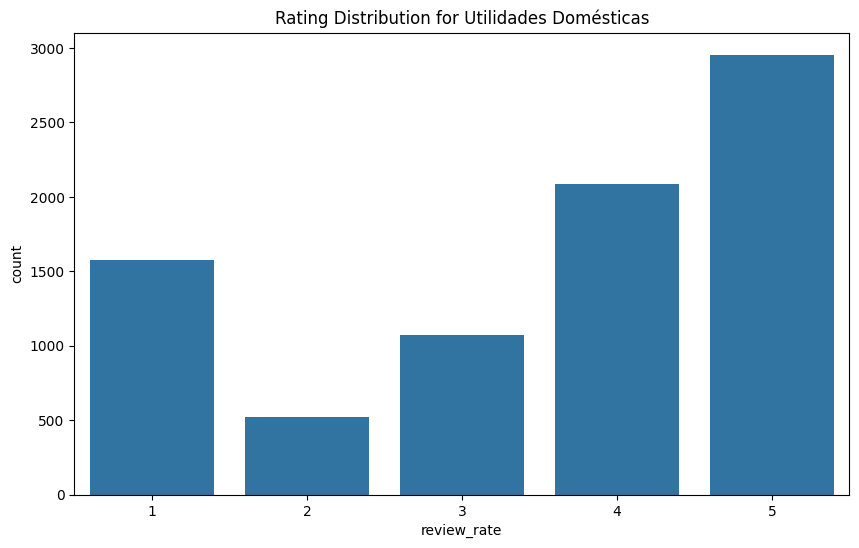

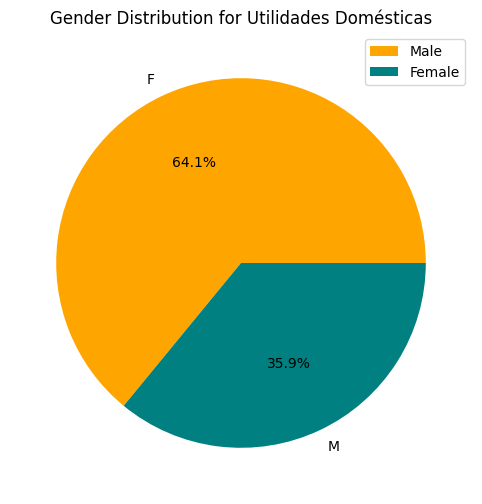


--- Analysis for category: Casa e Construção ---
Number of reviews: 4825
Average rating: 3.27

Top 5 products by number of reviews:
product_name
Câmera Wireless Ip Hd720p Noturna Sensor Infravermelho Wifi             90
Camera Lampada Led Wifi IP HD Panoramica Única 360º Espião              67
Chave Combinada em Cobre Berílio 41mm Tramontina PRO                    67
Climatizador de Ar Midea Amaf Frio 6 Litros Branco                      64
Câmera Ip Jl Protec Pantilt 1.0mp Ir-Cut Onvif - Hd - Wifi Com Áudio    46
Name: count, dtype: int64


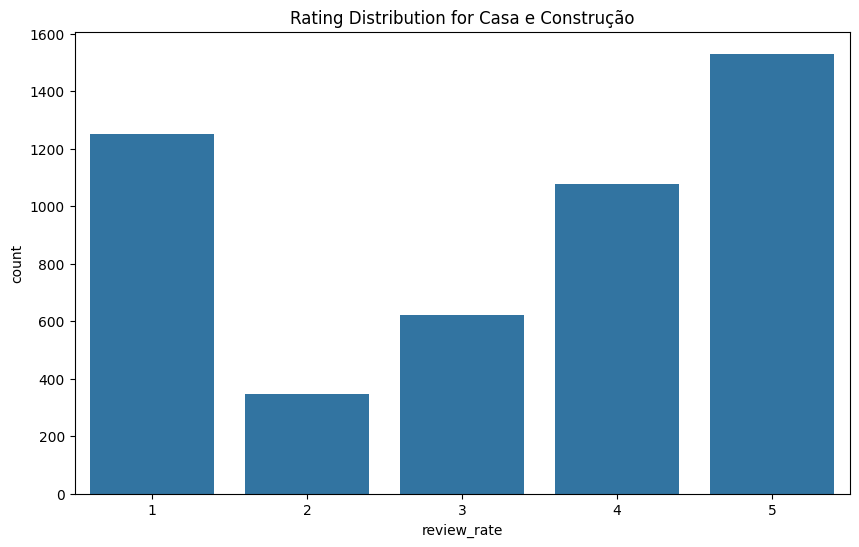

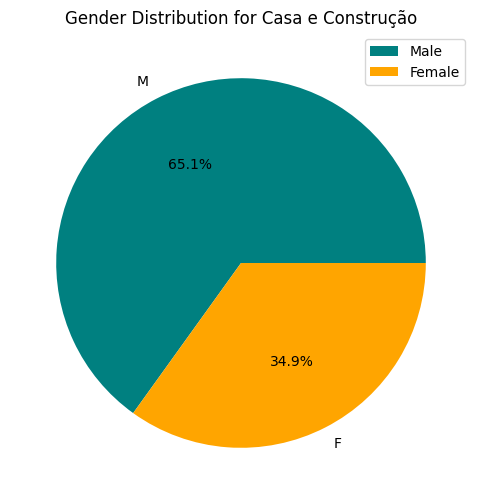


--- Analysis for category: Celulares e Smartphones ---
Number of reviews: 20847
Average rating: 3.72

Top 5 products by number of reviews:
product_name
Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Platinum                            791
Smartphone Samsung Galaxy J7 Metal Dual Chip Android 6.0 Tela 5.5" 16GB 4G Câmera 13MP - Dourado                                                674
Smartphone Motorola Moto G 5S Dual Chip Android 7.1.1 Nougat Tela 5.2" Snapdragon 430 32GB 4G Câmera 16MP - Dourado                             558
Smartphone Samsung Galaxy J7 Prime Dual Chip Android Tela 5.5" 32GB 4G Câmera 13MP - Dourado                                                    519
Smartphone Samsung Galaxy J5 Prime Dual Chip Android 6.0 Tela 5" Quad-Core 1.4 GHz 32GB 4G Wi-Fi Câmera 13MP com Leitor de Digital - Dourado    510
Name: count, dtype: int64


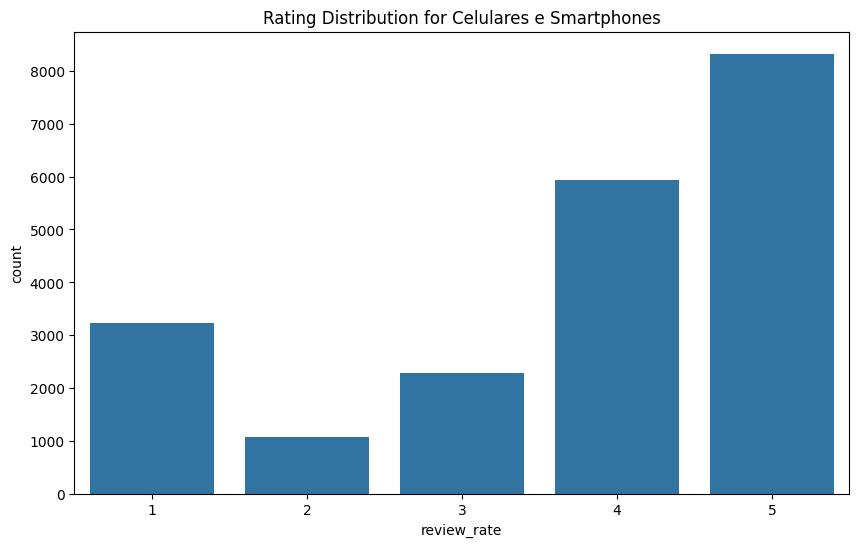

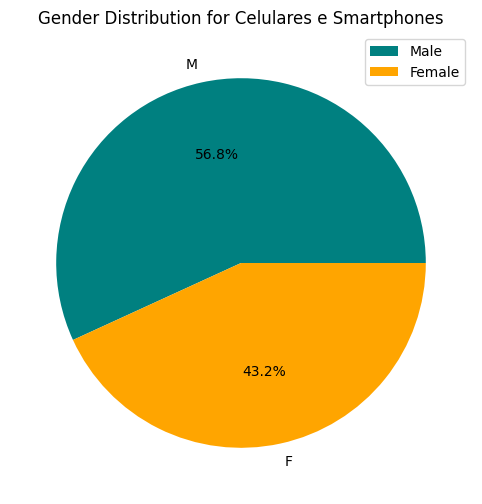


--- Analysis for category: Informática e Acessórios ---
Number of reviews: 7743
Average rating: 3.30

Top 5 products by number of reviews:
product_name
HD Externo Portátil Seagate Expansion 1TB USB 3.0              174
HD Externo Portátil Seagate Expansion 2TB USB 3.0 Preto        106
Roteador Repetidor Sinal Wifi 300mbps Wps Ap Aumentar Sinal    100
HD Externo Portátil WD Elements 1TB USB 3.0                     83
Google Chromecast 2                                             69
Name: count, dtype: int64


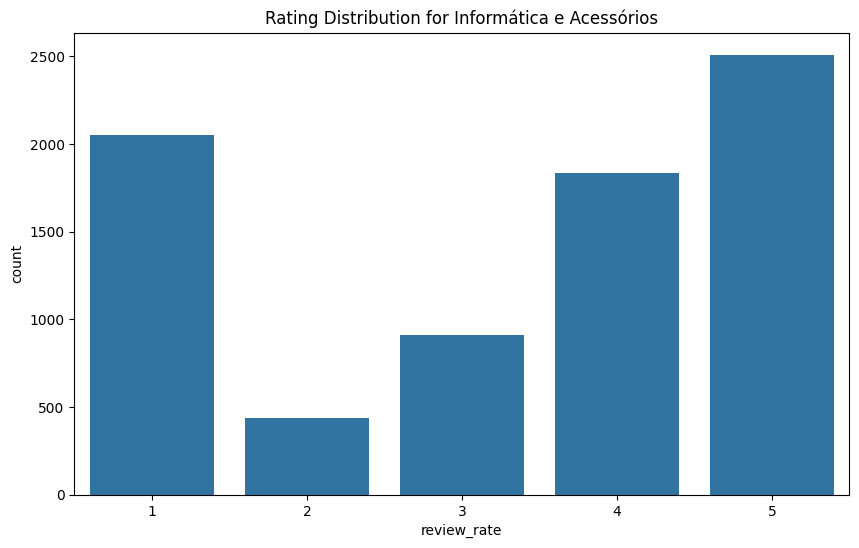

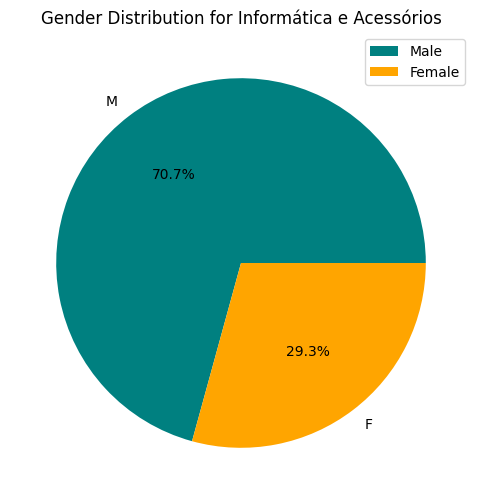


--- Analysis for category: Móveis ---
Number of reviews: 7787
Average rating: 2.92

Top 5 products by number of reviews:
product_name
Cozinha Compacta Amanda Itatiaia Branco Nevada                                     44
Cadeira Charles Eames Eiffel Em Polipropileno Preta Sem Braços, Base Em Madeira    35
Rack com Painel para TV até 55 Polegadas Twin Siena Móveis Malbec                  28
Kit 4 Banquetas Bistrô Aço Preto e Assento Preto                                   28
Guarda-roupa Scoth 3 Portas Branco                                                 24
Name: count, dtype: int64


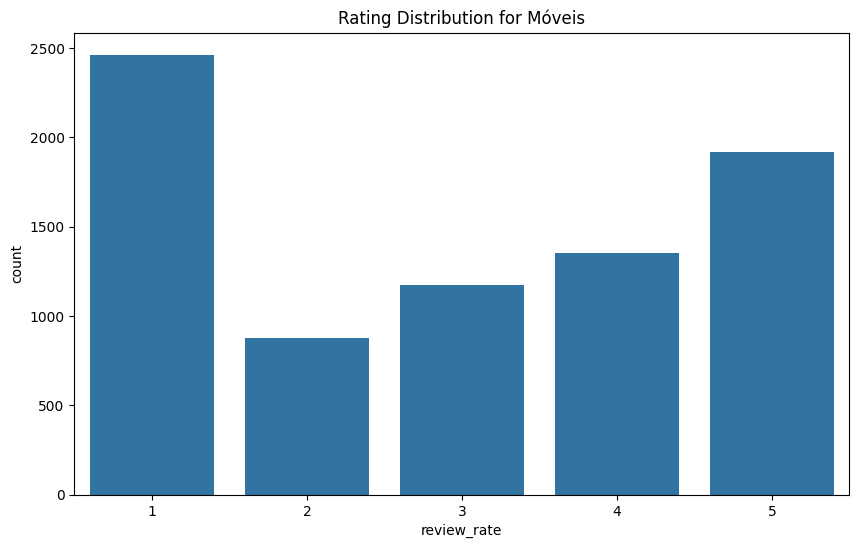

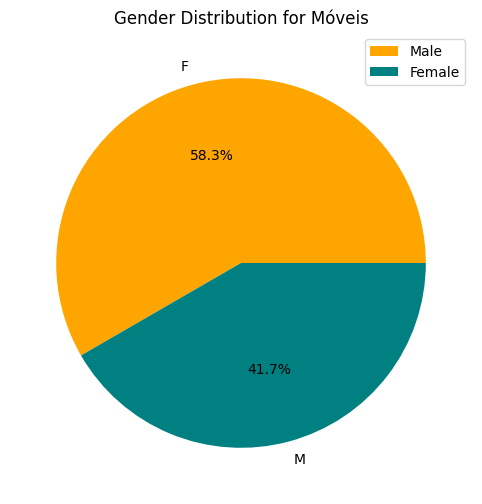


--- Analysis for category: Informática ---
Number of reviews: 4269
Average rating: 3.37

Top 5 products by number of reviews:
product_name
Notebook Samsung Essentials E35S Intel Core i3 4GB 1TB Tela LED HD 14'' Windows 10 Cinza - Samsung               291
Tablet Samsung Galaxy Tab A T280 8GB Wi-Fi Tela 7" Android Quad-Core - Preto                                     156
Notebook Essentials E25s Intel Celeron Dual Core 4GB 500GB Tela LED HD 14" Windows 10 Preto - Samsung            140
Notebook Samsung Expert X23 Intel Core I5 8GB (GeForce 910M de 2GB) 1TB Tela 15,6'' LED HD Windows 10 - Preto     99
Notebook Lenovo Ideapad 320 Intel® Core i5-7200u 8GB 1TB Tela 15,6" Windows 10 - Prata                            96
Name: count, dtype: int64


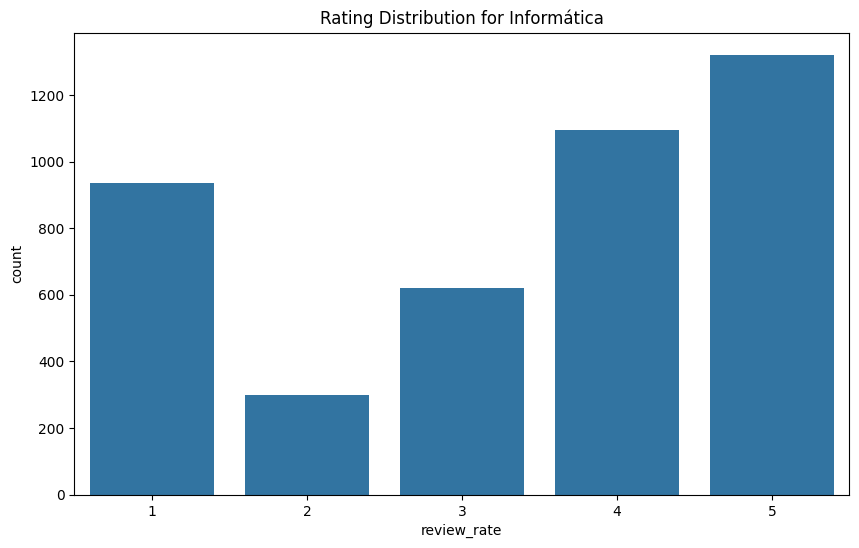

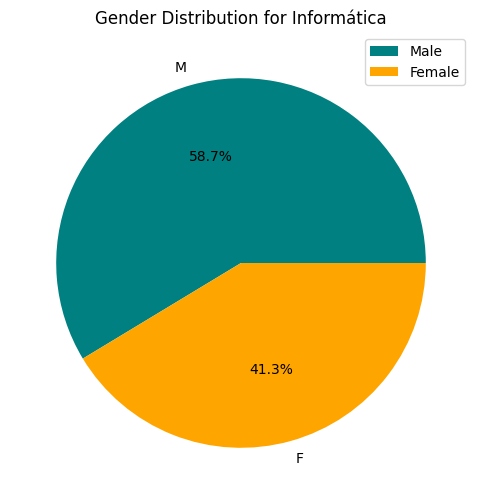


--- Analysis for category: Eletrodomésticos ---
Number of reviews: 4074
Average rating: 3.61

Top 5 products by number of reviews:
product_name
Micro-ondas Consul CM020 20 Litros Cinza Espelhado                      197
Lavadora de Roupas Brastemp 11kg BWK11 - Branco                         136
Micro-ondas Brastemp Ative! BMJ38 38 Litros Inox                         89
Geladeira / Refrigerador Brastemp Frost Free Clean BRM39 352L Branco     81
Lavadora de Roupas Brastemp 11kg BWS11 Cesto Smart Wave - Branco         79
Name: count, dtype: int64


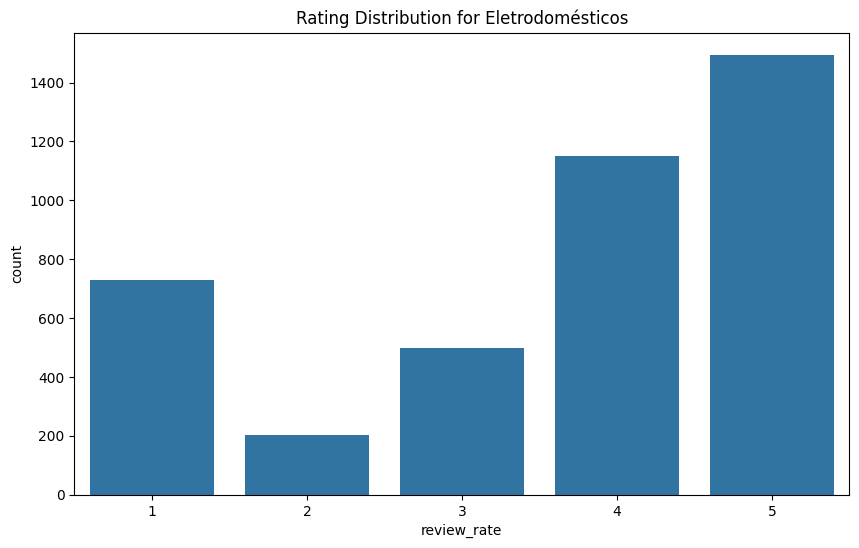

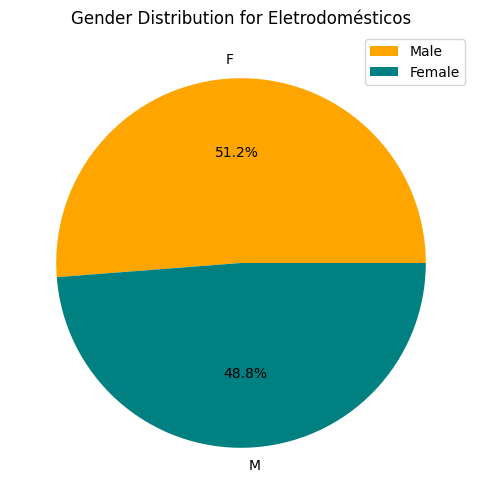


--- Analysis for category: Moda ---
Number of reviews: 2694
Average rating: 3.55

Top 5 products by number of reviews:
product_name
Kit Com 10 Cuecas Boxer De Cotton 3 0 Polo Match    83
Kit com 10 Cuecas Boxer Sem Costura Ocean Wear      76
Kit Com 10 Cuecas Boxer De Cotton - Polo Match      67
Kit com 10 Calcinhas Modelo Americana - Mel         56
Carteira Niege Merida                               37
Name: count, dtype: int64


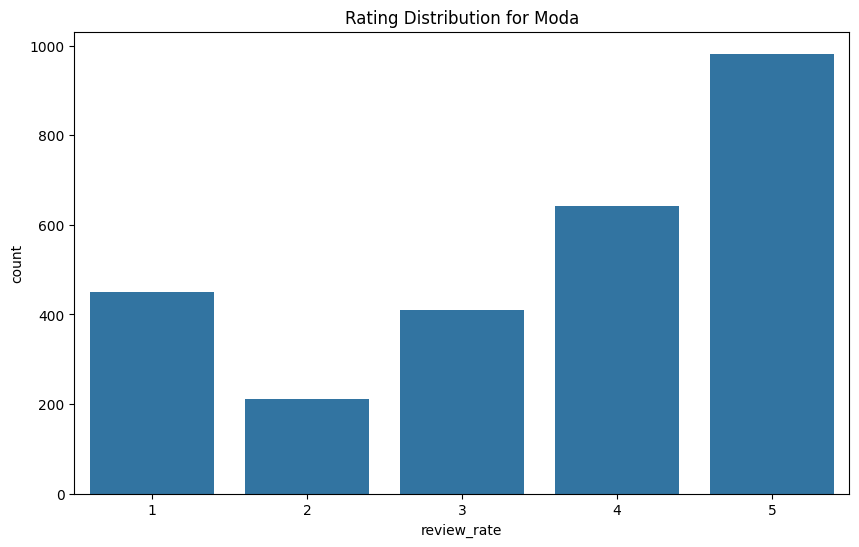

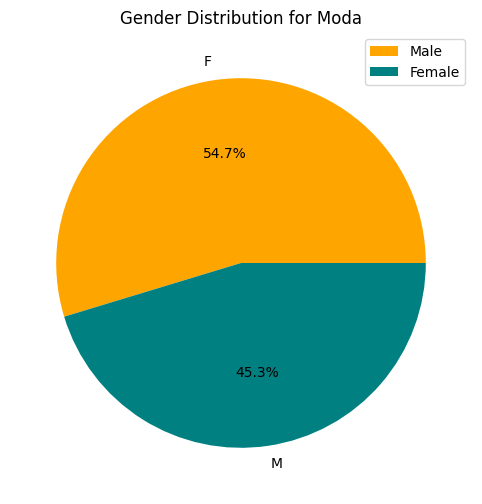


--- Analysis for category: Artigos de Festas ---
Number of reviews: 89
Average rating: 3.61

Top 5 products by number of reviews:
product_name
Kit Festa Provençal Mdf Branco - Linha Premium                           19
Kit Festa Provençal Mdf 50 Peças - Arabesco                               5
Fantasia Macacão De Unicórnio Kigurumi Adulto Azul E Branco Com Gorro     4
Kit Festa Mdf Provençal 50 Peças - Arabesco                               3
Fantasia Macacão De Unicórnio Kigurumi Adulto Lilás Com Gorro             3
Name: count, dtype: int64


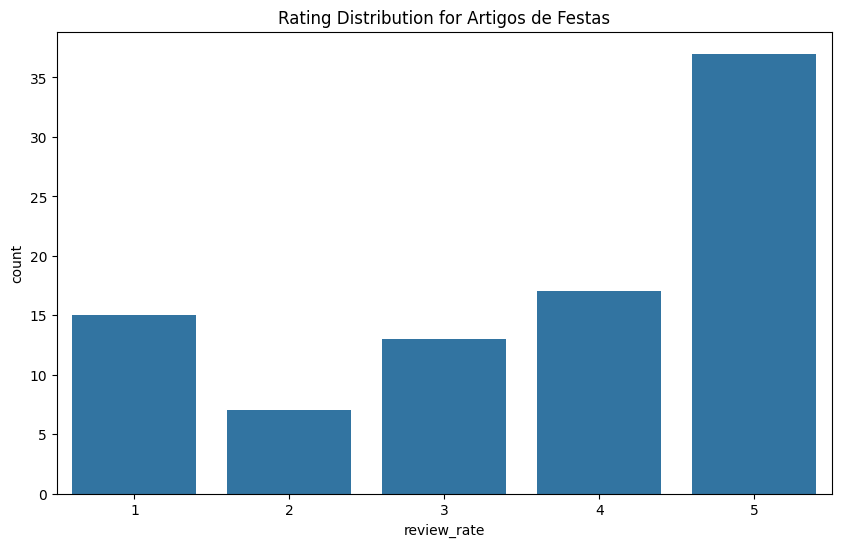

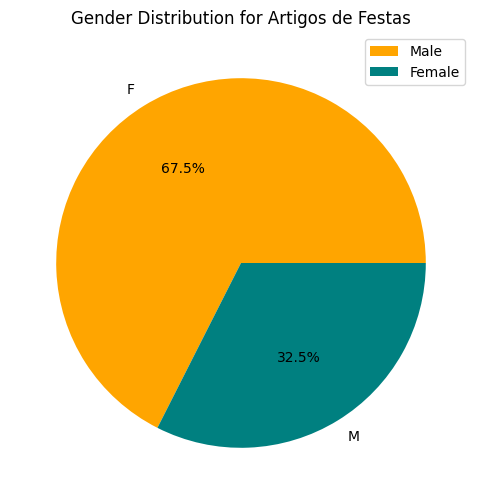


--- Analysis for category: Câmeras e Filmadoras ---
Number of reviews: 1183
Average rating: 3.36

Top 5 products by number of reviews:
product_name
Cartão De Memória 32Gb Micro Sd + Adaptador SD                               72
Câmera Digital DSLR Canon EOS Rebel T5 18MP Lente EF-S18-55mm III - Preta    41
Cartão Micro SD Ultra Classe 10 Com Adapt Para Android 64GB - Sandisk        40
Câmera Digital Semiprofissional Canon SX520HS 16MP Zoom óptico 42x           35
Camera Action Go Cam Pro Sport Ultra 4k Com Bastão De Selfie                 34
Name: count, dtype: int64


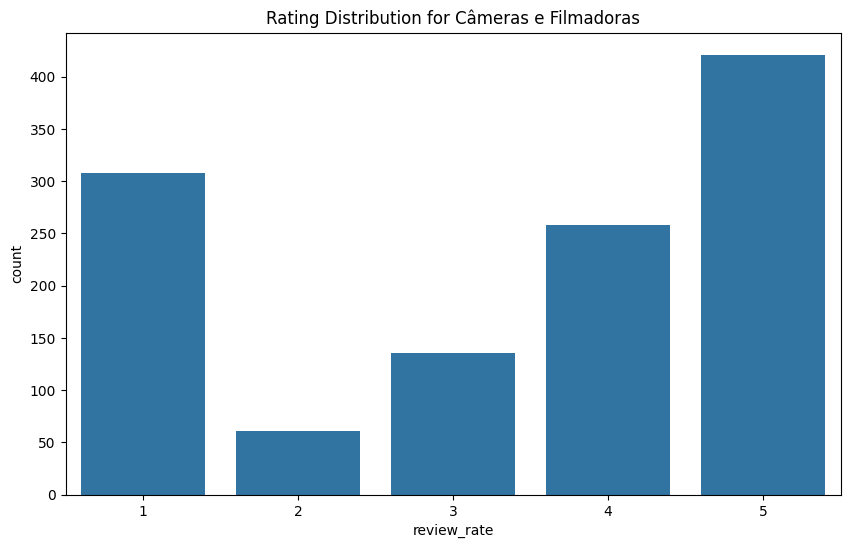

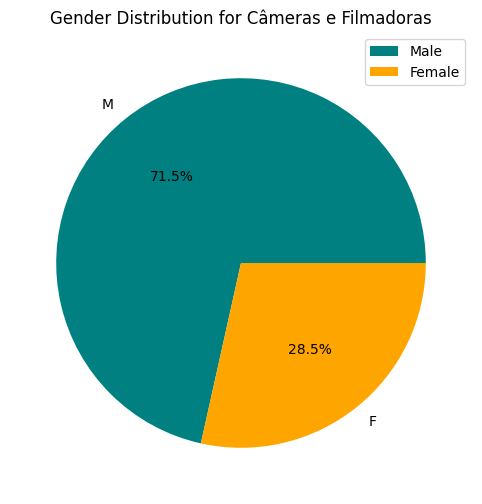


--- Analysis for category: Informática Acessórios ---
Number of reviews: 1083
Average rating: 3.90

Top 5 products by number of reviews:
product_name
Suporte De Cama Sofá Mesa Notebook Articulada Multifuncional                                2
Fonte Carregador Lenovo G400s Touch G405 G410 G500 G510 65w                                 1
Hub Usb 3.0 -  4 Portas - Orico Ultra Mini - W5ph4-U3                                       1
Base Para Notebook L1 Preta Com Fan 160mm R9-Nbc-Npl1-Gp Cooler Master                      1
Hd - 3.000gb (3tb) / 7.200rpm / Sata3 / 3,5pol - Seagate Barracuda 7200.14 - St3000dm001    1
Name: count, dtype: int64


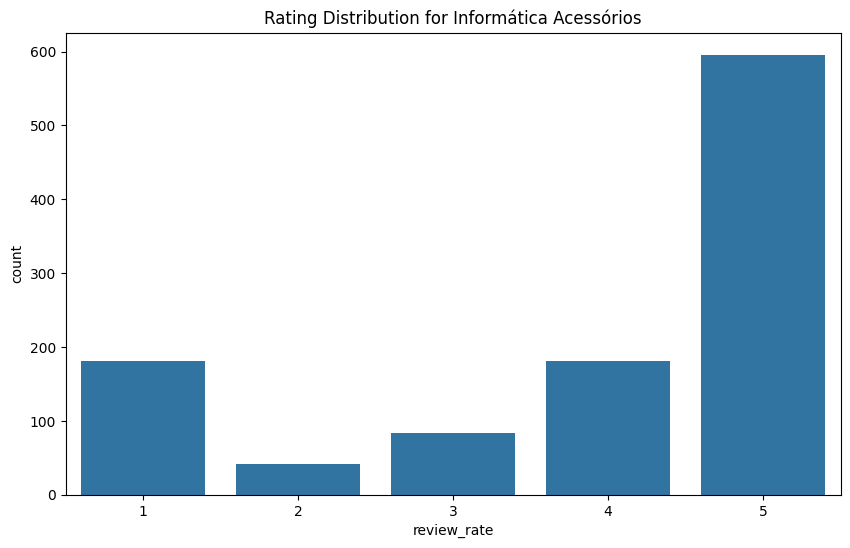

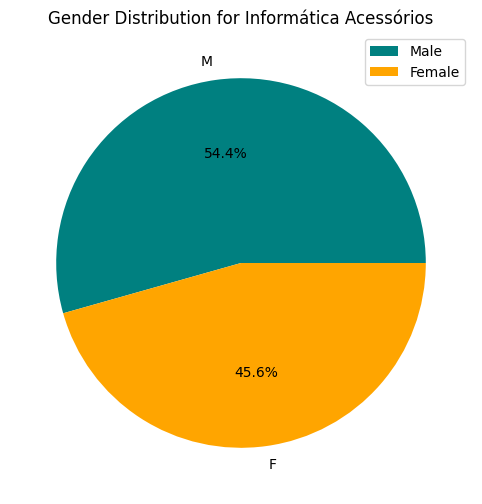


--- Analysis for category: Saúde ---
Number of reviews: 2758
Average rating: 3.21

Top 5 products by number of reviews:
product_name
Suporte Para Escova Dispenser De Pasta De Dente Automatico                             61
Medidor Monitor Automático De Pressão Arterial                                         55
Balança Digital de Banheiro 180 KG Vidro Temperado Residencial, Academia ou Clinica    47
Aparelho de Pressão Digital Automático de Pulso - LP200 - Premium                      36
Oxímetro de Pulso portátil G-Tech - Modelo Oled Graph                                  36
Name: count, dtype: int64


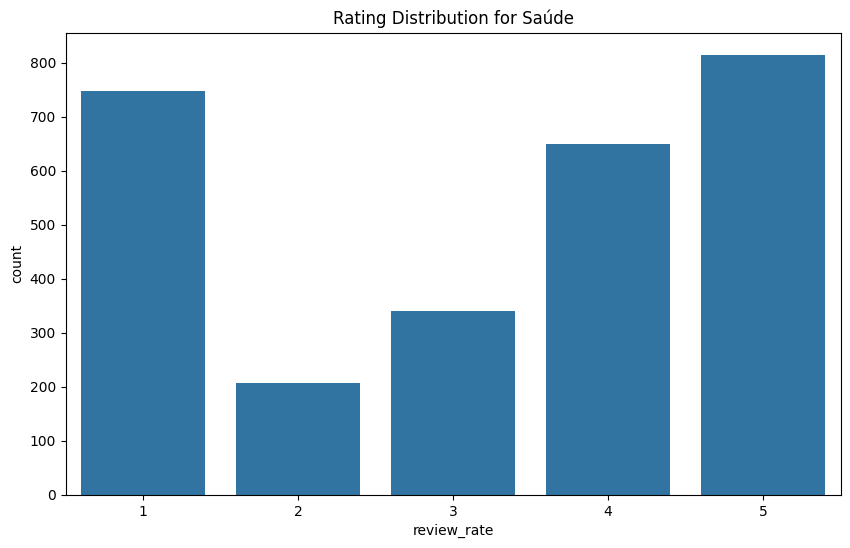

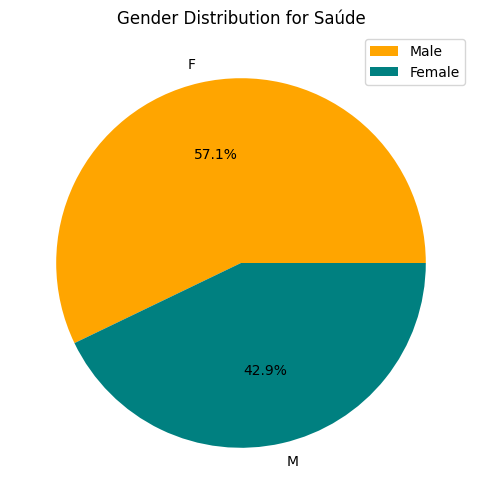


--- Analysis for category: Cama, Mesa e Banho ---
Number of reviews: 3837
Average rating: 3.34

Top 5 products by number of reviews:
product_name
Kit 2 Travesseiros 45x65cm 100% Penas de Ganso - Daune                  117
Tapete Muito Peludo 4cm Luxo 2.00 X2.40 - Bege Mesclado                  74
Jogo de Toalhas Banhão Bali 5 Peças 100% Algodão - Orb By Buddemeyer     52
Jogo de Banho Paris 5 Peças - Orb By Buddemeyer                          42
Travesseiro Nasa Kit 2 Pecas - Antialergico - Toque Macio                40
Name: count, dtype: int64


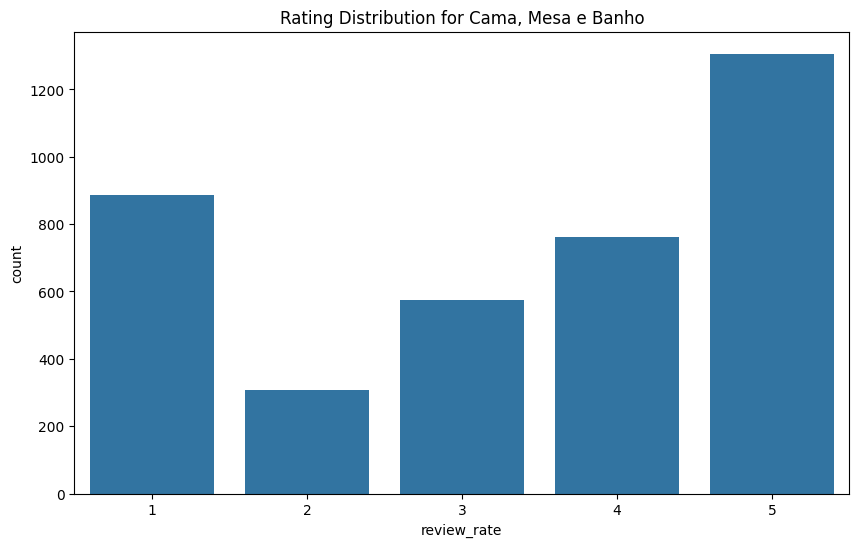

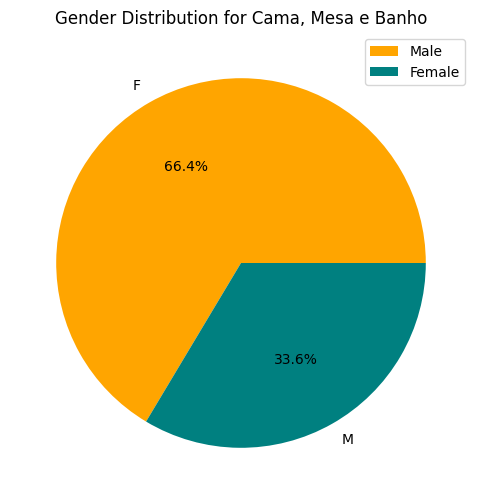


--- Analysis for category: Wearable ---
Number of reviews: 269
Average rating: 2.81

Top 5 products by number of reviews:
product_name
Relógio Smartwatch A1 Original Touch Bluetooth Gear Chip    37
Relogio Bluetooth Smartwatch Dz09 Touch Preto               32
Gear S3 Frontier Preto - Samsung                            26
Pulseira Inteligente Xiaomi Mi Band 2 Preta                 21
Samsung Gear Iconx 2018 R140 - Preto                        11
Name: count, dtype: int64


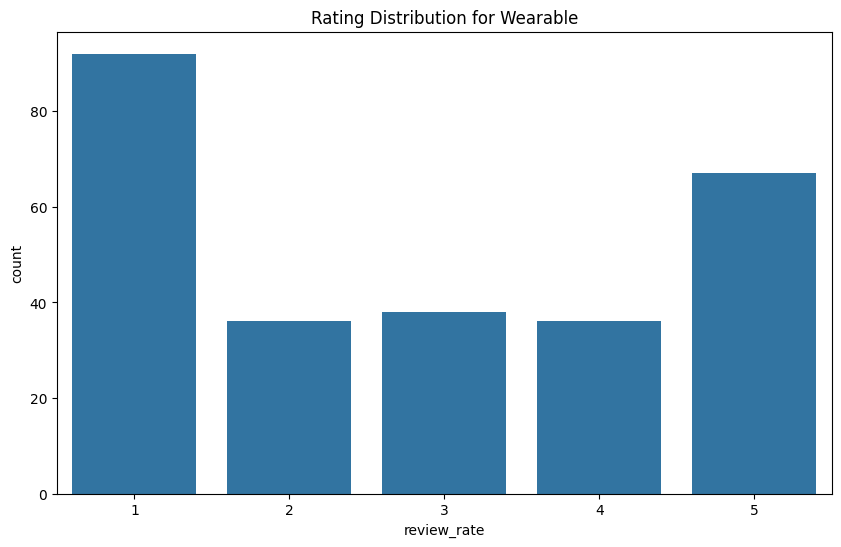

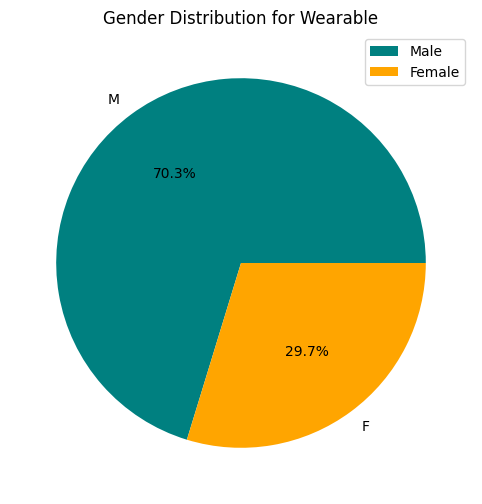


--- Analysis for category: Beleza & Saúde ---
Number of reviews: 1071
Average rating: 4.08

Top 5 products by number of reviews:
product_name
Touca Hot Para Encaixe De Secador, Estufa Térmica    1
Name: count, dtype: int64


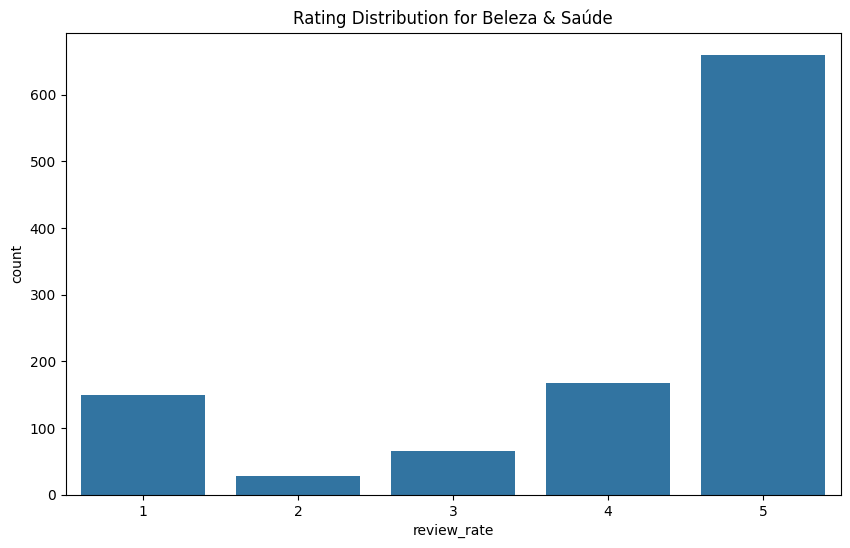

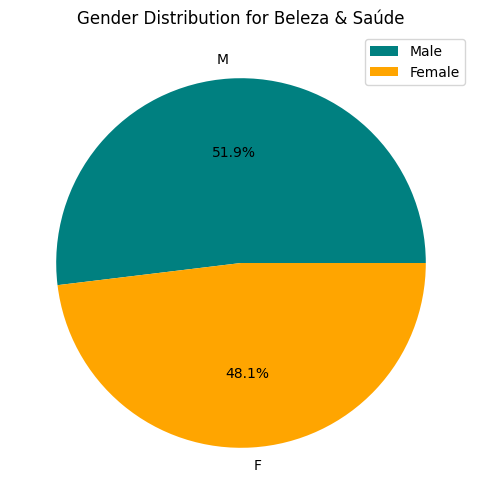


--- Analysis for category: Brinquedos ---
Number of reviews: 4976
Average rating: 3.46

Top 5 products by number of reviews:
product_name
Boneca Baby Alive Cuida de Mim Loira C2691 - Hasbro                         87
Iron Man - Mark XLIII Quarter Scale - Avengers: Age of Ultron - Hot Toys    64
Mini Boneca Supresa - LOL - Lil Outrageous Littles - Série 2 - Candide      45
Mini Boneca Surpresa - LOL - Lil Sisters - Série 2 - Candide                35
Casa na Árvore Homeplay                                                     35
Name: count, dtype: int64


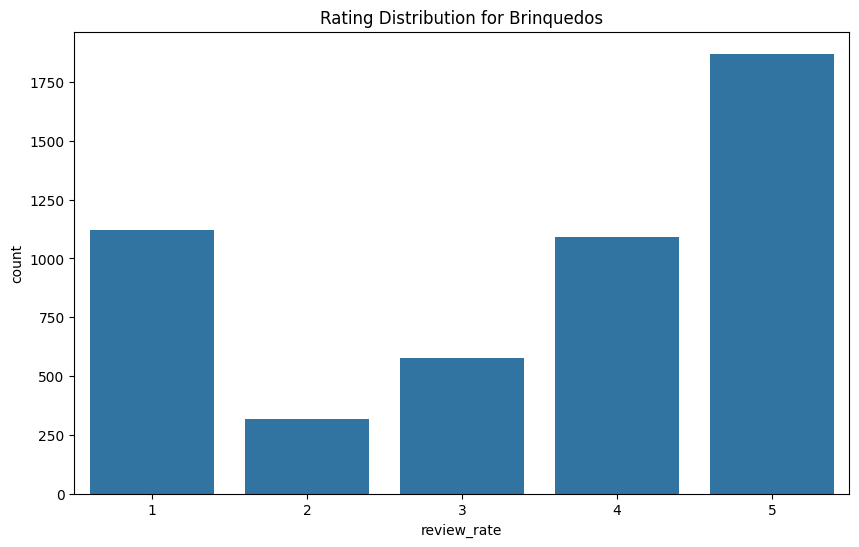

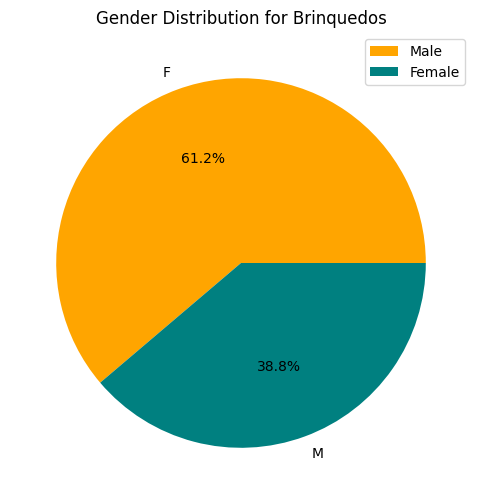


--- Analysis for category: Ferramentas e Jardim ---
Number of reviews: 2035
Average rating: 3.62

Top 5 products by number of reviews:
product_name
Marreta Oitavada Cube 2,5kg - Tramontina Pro          126
Chave Combinada Cube 40mm - Tramontina Pro             68
Chave Combinada Cube 34mm - Tramontina Pro             30
Mangueira Magica De Jardim Expansivel Até 30 Metro     26
Chave Para Tubos Cube 24 - Tramontina Pro              25
Name: count, dtype: int64


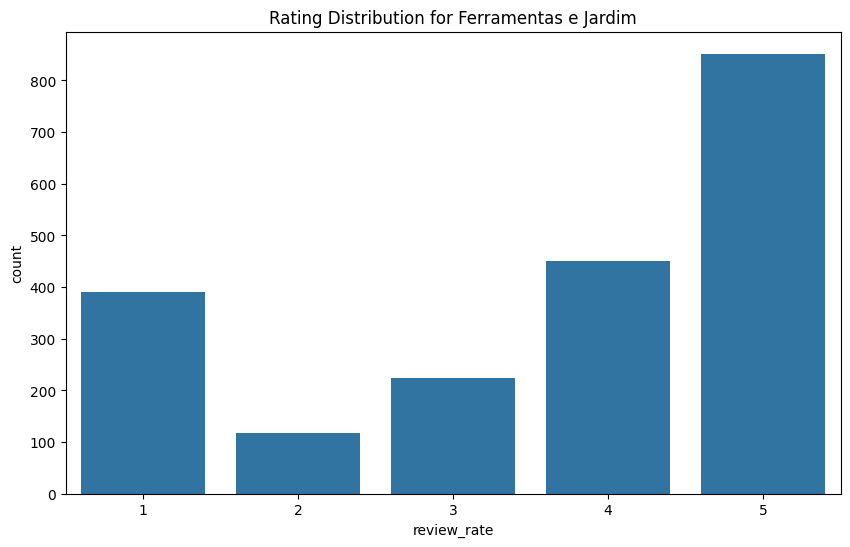

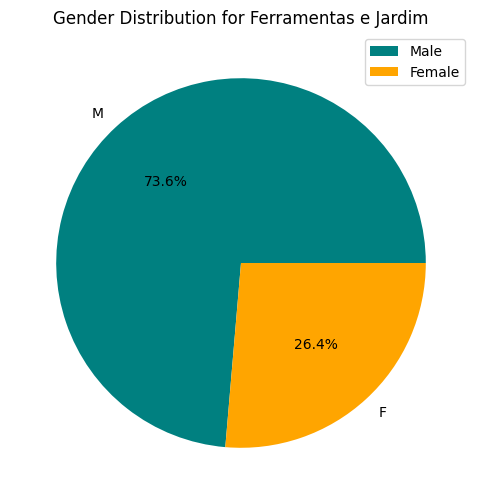


--- Analysis for category: Utilidades domesticas ---
Number of reviews: 726
Average rating: 4.19

Top 5 products by number of reviews:
Series([], Name: count, dtype: int64)


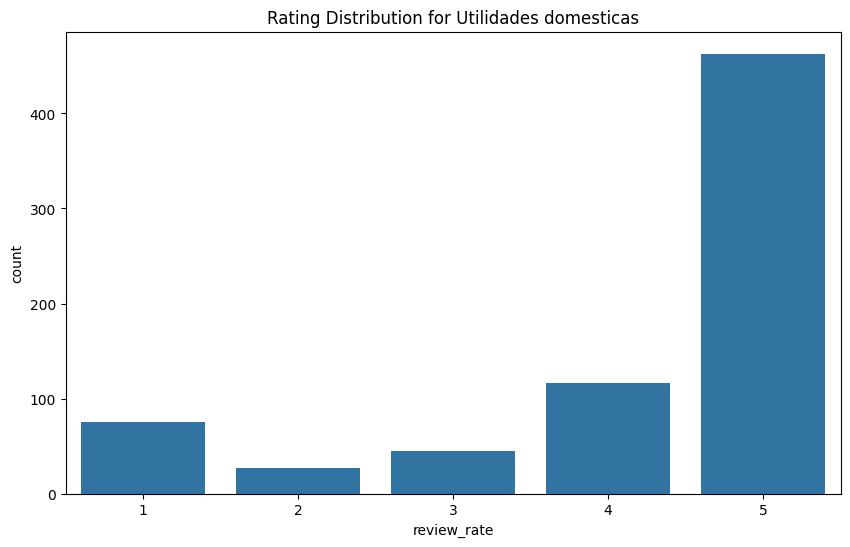

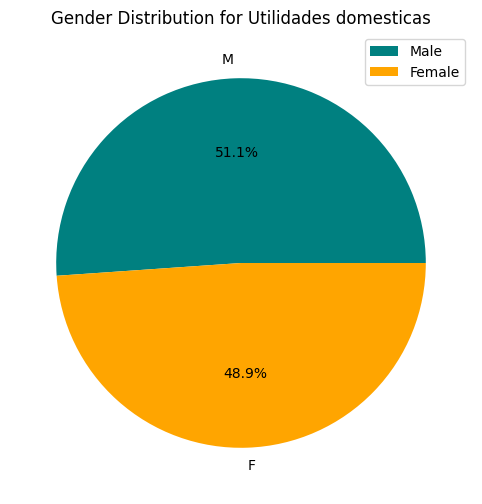


--- Analysis for category: Livros ---
Number of reviews: 4304
Average rating: 4.19

Top 5 products by number of reviews:
product_name
Álbum da Copa do Mundo Rússia 2018 com Capa Dura + 60 figurinhas    59
Livro - Vade Mecum 2018 Ediçâo Especial                             48
Livro - Coleção Análise da Inteligência de Cristo                   48
Box - Saga Encantadas (3 livros) Edição Econômica                   31
Box Copa da Russia 2018: 2 Álbuns Capa Dura + 1000 Figurinhas       28
Name: count, dtype: int64


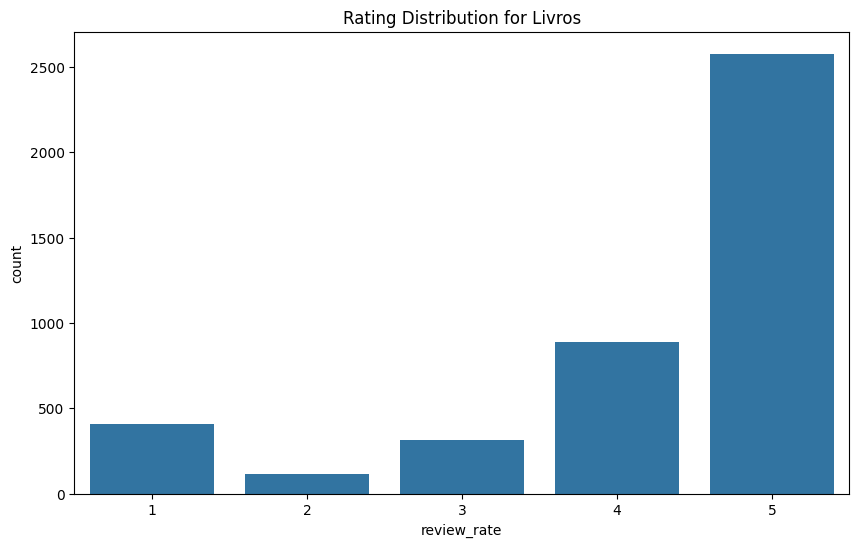

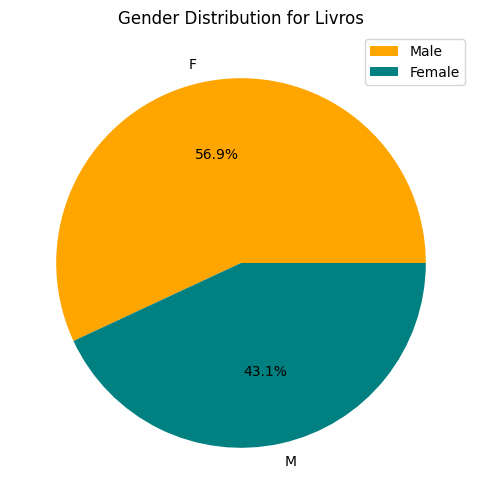


--- Analysis for category: Esporte e Lazer ---
Number of reviews: 3630
Average rating: 3.28

Top 5 products by number of reviews:
product_name
Hoverboard 6.5 Vermelho Bluetooth Led Lateral E Frontal Com Mochila - Bateria Samsung                  51
Bicicleta Sport Gold Aro 29 Mountain Bike Freio à Disco Quadro em Aço Carbono 21 Marchas KLS           49
Hoverboard Smart Balance Whell 6.5 Polegadas Branco Com Bluetooth , Led Frontal E Lateral E Mochila    31
Hoverboard 6,5" Polegadas - Smart Balance- Fire Games-Bluetooth - Bateria Samsung - C/ Bolsa - Azul    28
Cinta Modeladora Abdominal Hot Belt Power Shape Now                                                    25
Name: count, dtype: int64


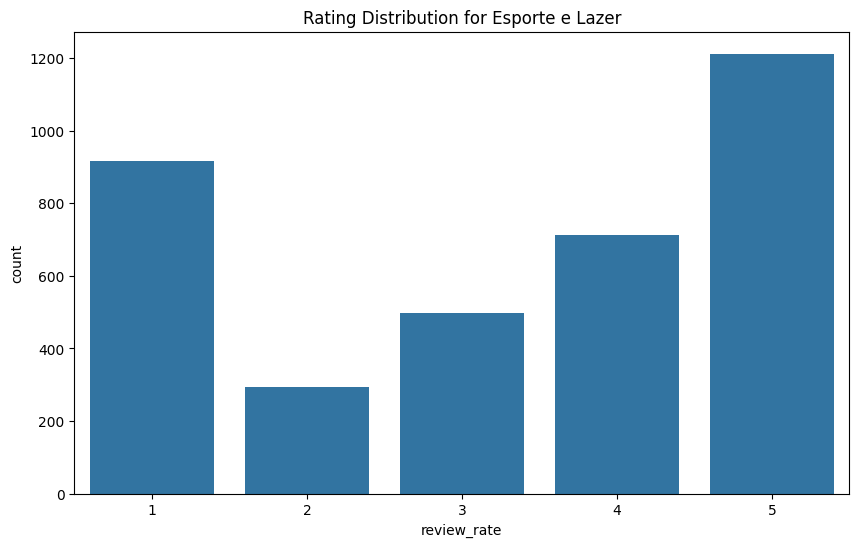

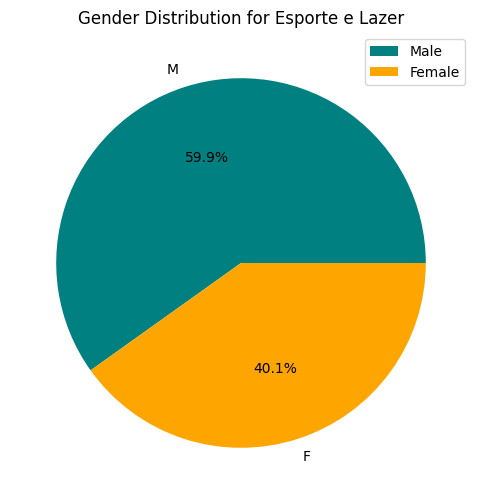


--- Analysis for category: Malas e Acessórios ---
Number of reviews: 794
Average rating: 3.66

Top 5 products by number of reviews:
product_name
Mochila Para Notebook Dell Professional 15,6" Preto                                                   66
Mochila Notebook Reforçada Cabo De Aço Denlex                                                         53
Mochila Sport Escolar Camping Trilha Viagem Passeio                                                   21
Mochila p/ Notebook Até 17" Mb-NJ300 em Nylon, Costas Acolchoadas, Zíper Duplo, Preta - Travel Max    18
Mochila Notebook Reforçada Cabo De Aço Dl0013                                                         12
Name: count, dtype: int64


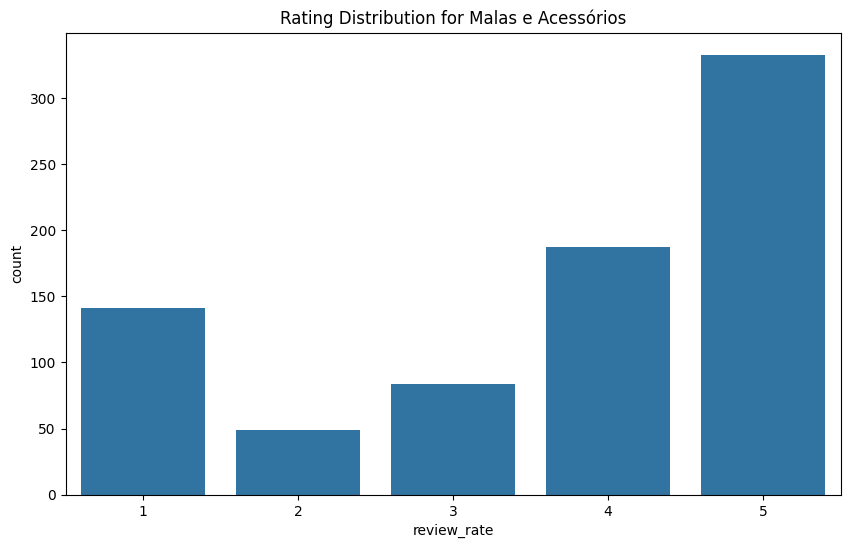

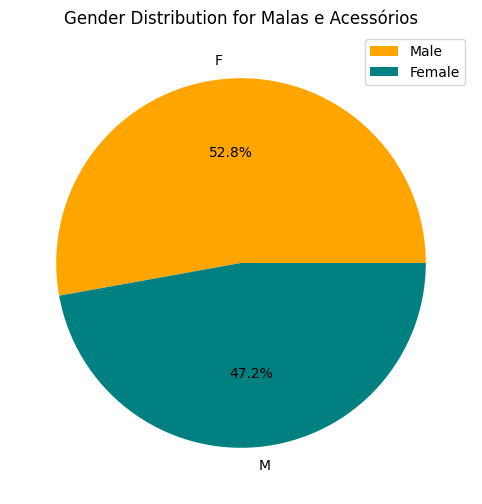


--- Analysis for category: Alimentos e Bebidas ---
Number of reviews: 831
Average rating: 3.72

Top 5 products by number of reviews:
product_name
Vodka Absolut Original 1 Litro                                31
Vodka Absolut Original - 750ml                                24
Kit 2 Un Moder Diet 40 Caps + Oleo De Coco Sache 15g Copra    20
Whisky Ballantine's Finest - 1L                               13
Café Marita Versão 3.0 100gr                                  12
Name: count, dtype: int64


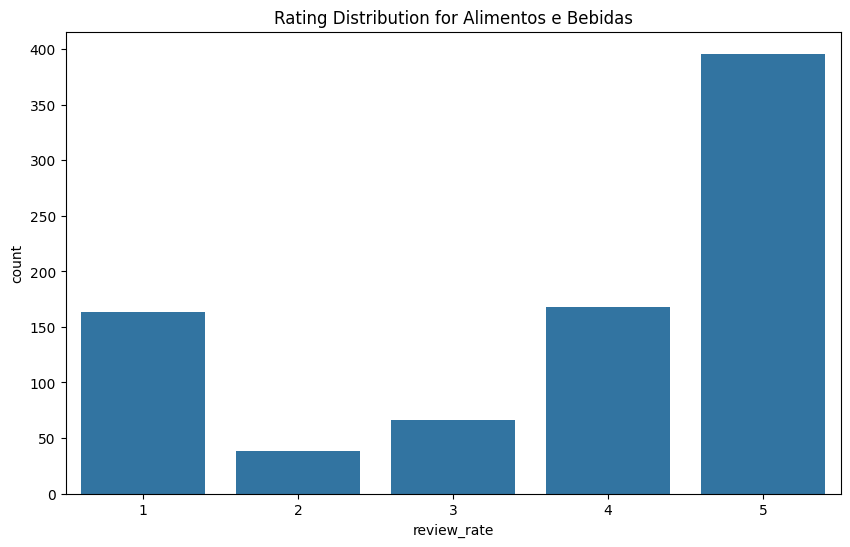

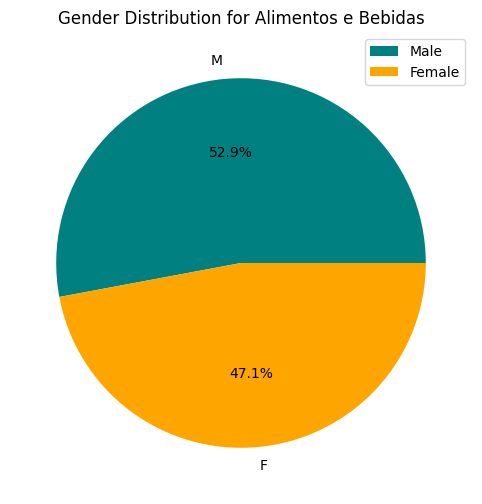


--- Analysis for category: Suplementos e Vitaminas ---
Number of reviews: 1215
Average rating: 3.01

Top 5 products by number of reviews:
product_name
Moder Diet Emagrecedor 40 Capsulas                                  24
Fit Gold 40cps 100% Original                                        22
Blend Whey C/ Bcaa 3kg Gold Standard Matéria Prima Importada        18
Quitoplan 60CPS                                                     18
Whey Isolado C/ Bcaa Definition Pote 3 Kg + Creatina Em Pó 150 G    16
Name: count, dtype: int64


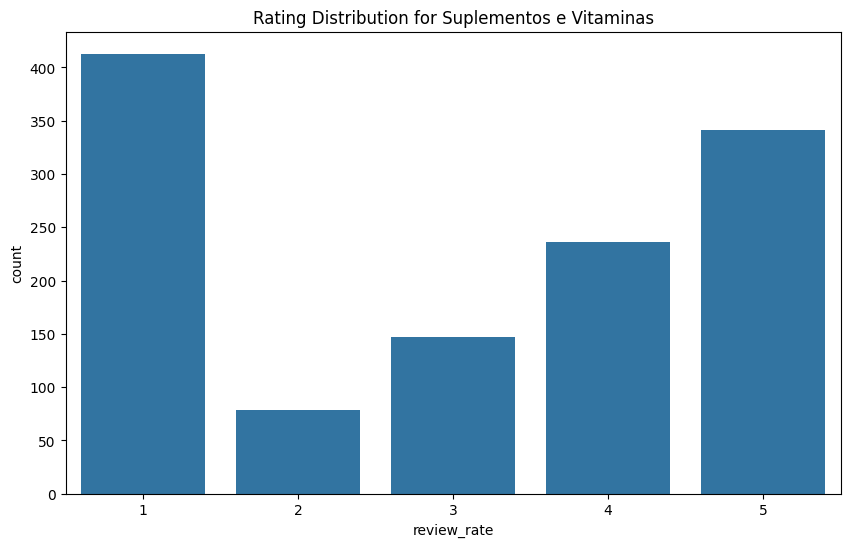

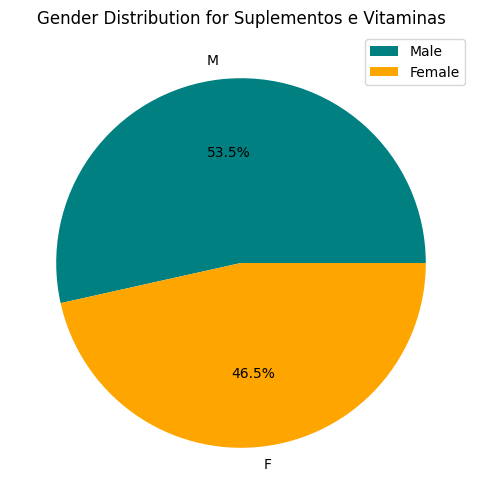


--- Analysis for category: Automotivo ---
Number of reviews: 4428
Average rating: 3.33

Top 5 products by number of reviews:
product_name
Motor Chevrolet Performance 572 Completo 720hp Deluxe                                                  172
Fita Led 5m Ultra Rgb 5050 Prova Dagua + Controle + Fonte                                               27
Militec-1 Militec-1 Condicionador De Metais Militec 1 200 Ml Para Motores, Rolamentos E Onde Há Atr     25
Bateria Moura 60ah - M60gd - Original De Montadora - Positivo Direito                                   21
Receptor Bluetooth Receiver P2 Musica Celular Para Som Carro                                            21
Name: count, dtype: int64


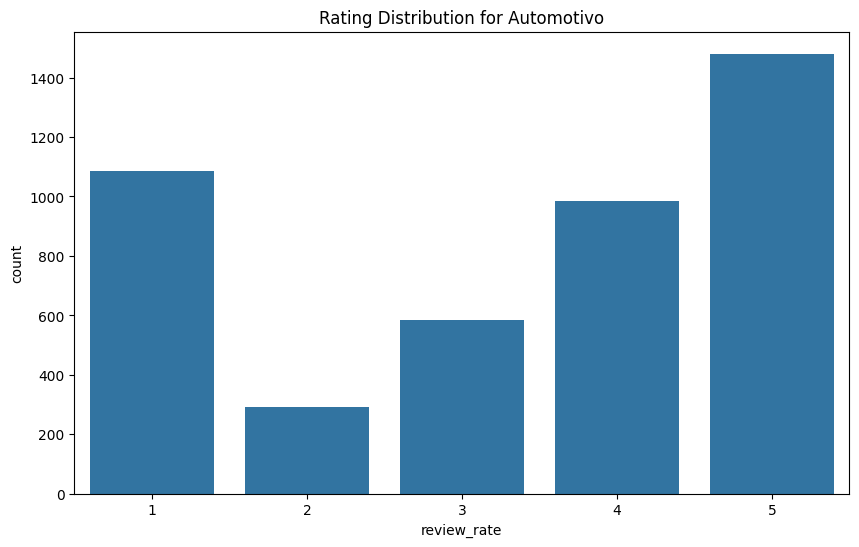

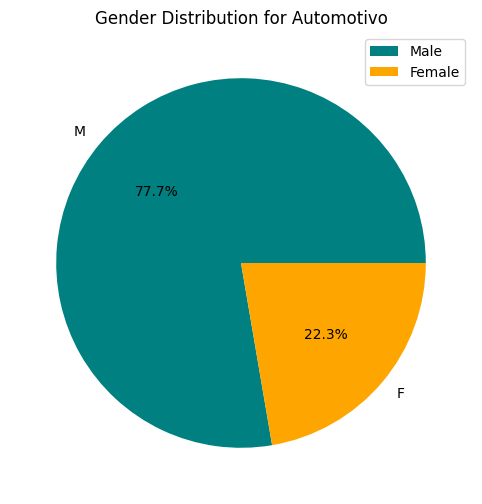


--- Analysis for category: Pet Shop ---
Number of reviews: 1535
Average rating: 3.63

Top 5 products by number of reviews:
product_name
Nexgard G 10 A 25kg Com 3 Tabletes Mastigavei                                         21
Antipulgas E Carrapatos Nexgard 28,3mg Para Cães De 4,1 A 10kg 3 Tabletes - Merial    21
Maquina Tosa Profissional Kit Caes Gatos Cachorro 110v Pente                          16
Máquina de Tosa Eterny ET37011A                                                       15
Kit Grade De Porta Branca + 1 Extensor 10cm - Romati                                  12
Name: count, dtype: int64


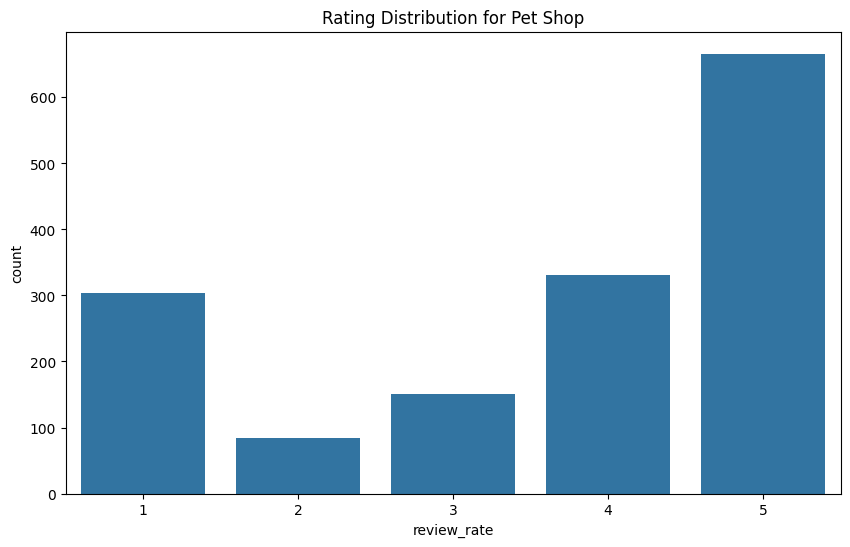

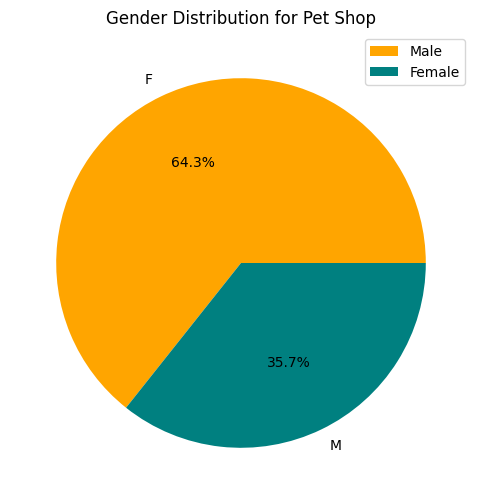


--- Analysis for category: Bebês ---
Number of reviews: 3298
Average rating: 3.68

Top 5 products by number of reviews:
product_name
Fraldas Huggies Turma Da Mônica Soft Touch M 46un.                 119
Fraldas Descartáveis Huggies Primeiros 100 dias P - 54 Unidades     64
Babá Eletrônica Digital Com Video E Visão Noturna Termômetro        54
Carrinho de Bebê Travel System Reverse Azul - Cosco                 46
Cadeira Para Auto Speed Preta 15 a 36kg - Voyage                    36
Name: count, dtype: int64


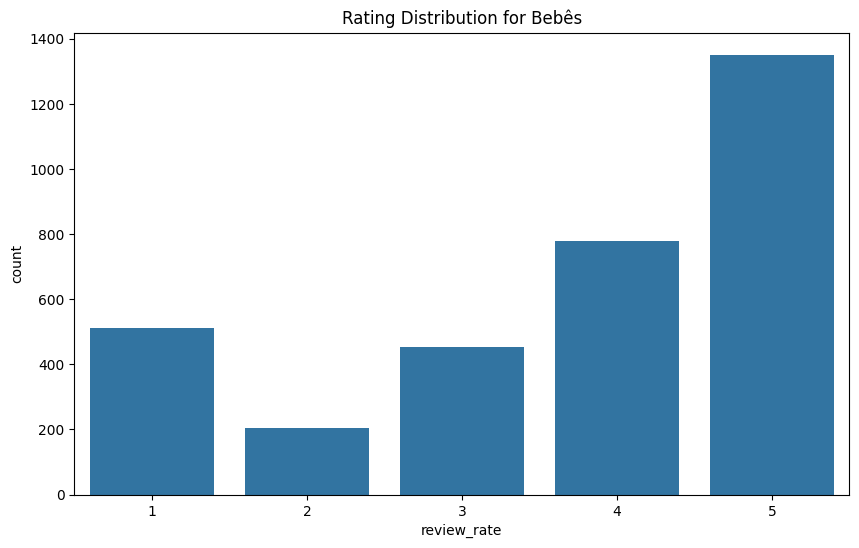

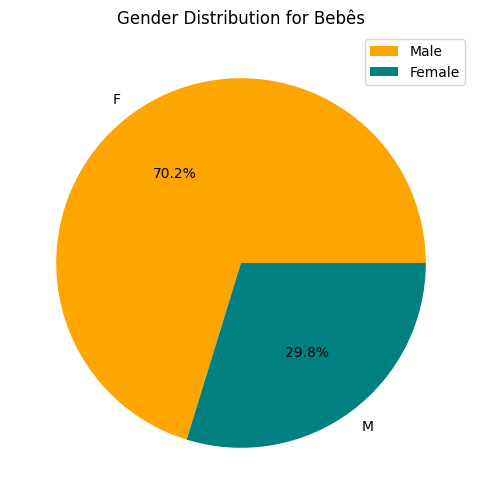


--- Analysis for category: Filmes e Séries ---
Number of reviews: 594
Average rating: 4.33

Top 5 products by number of reviews:
product_name
Dvd - Guardiões Da Galáxia - Vol. 2                        6
Coleção DVD Game Of Thrones: Temporadas 1-7 (35 Discos)    5
DVD - Game of Thrones 7º  Temporada Completa (5 Discos)    5
Blu-ray Liga da Justiça                                    4
DVD - Logan                                                4
Name: count, dtype: int64


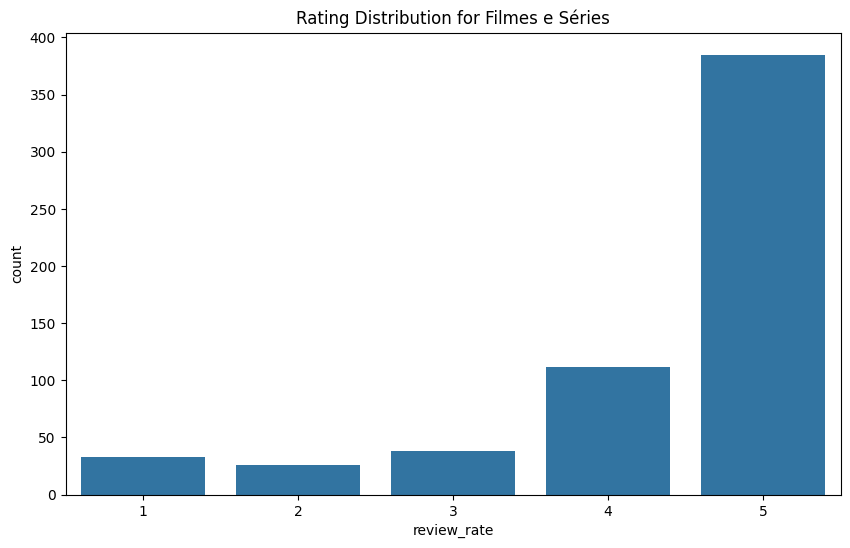

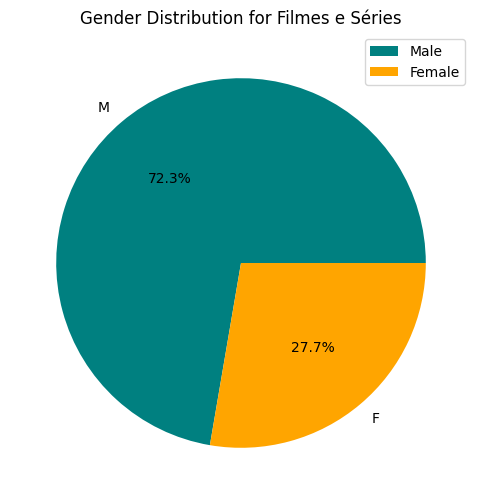


--- Analysis for category: Miscellaneous ---
Number of reviews: 352
Average rating: 3.25

Top 5 products by number of reviews:
product_name
Caixa De Som Bluetooth Lâmpada Multi Led Wj-L2                                           21
Asus Zenfone 2 Ze551ml 64gb Dual Prata                                                   13
Americanas Prime - 12 meses de assinatura                                                 9
Zap Professional- Escova Progressiva All Time - Kit 2x1kg                                 7
Cinta Modeladora - Afina Cintura, Auxilia Na Redução De Medidas Com Calor Terapêutico     5
Name: count, dtype: int64


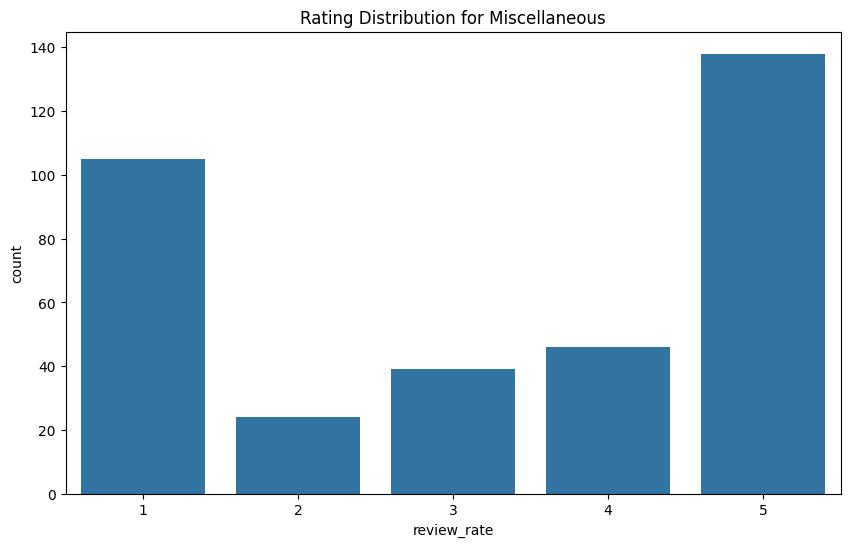

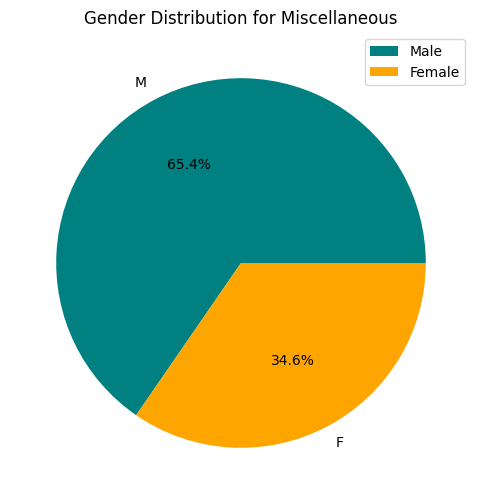


--- Analysis for category: Papelaria ---
Number of reviews: 1365
Average rating: 3.69

Top 5 products by number of reviews:
product_name
Bandeja De Isopor Branca Hf-0 Hamburgueira Com 400 Unidades Fibraform           45
Calculadora Financeira HP12C - HP                                               21
Fragmentadora Preta com Cesto  para 7 Folhas Cd e Cartão Grande - Multilaser    12
Calculadora Financeira 12C Gold + Capa - HP                                     10
Calculadora Científica Hp 10s+                                                   9
Name: count, dtype: int64


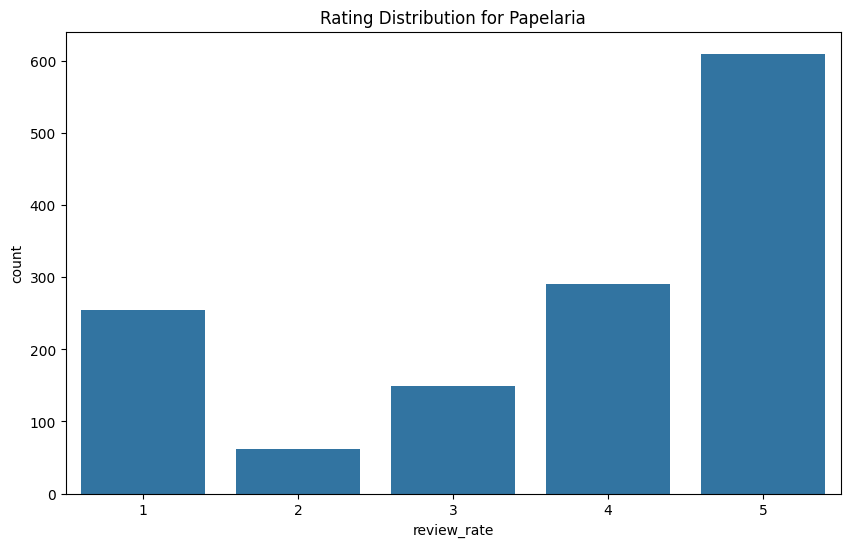

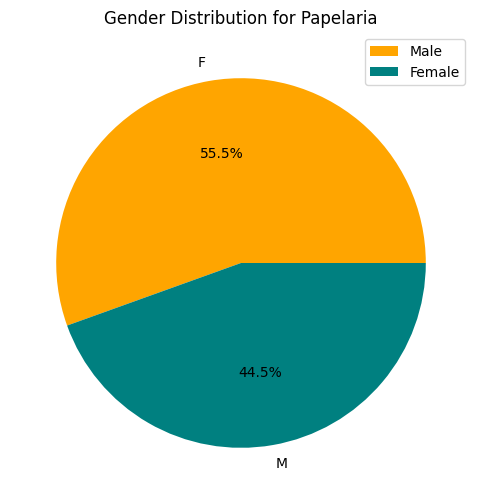


--- Analysis for category: Áudio ---
Number of reviews: 1495
Average rating: 2.98

Top 5 products by number of reviews:
product_name
Fone de Ouvido Philips Preto - SHL3060BK/00                            34
Fone De Ouvido M Headphone P15 Bluetooth 4.0 Fm Micro Sd               30
Mini System Sony GTK-XB5 Extra Bass 200RMS Iluminação NFC Bluetooth    24
Fone de Ouvido Sony MDR-ZX310AP/BQCE7 Headphone Preto                  23
Fone De Ouvido Headphone Sports Amw-810 Com Bluetooth - Estéreo        21
Name: count, dtype: int64


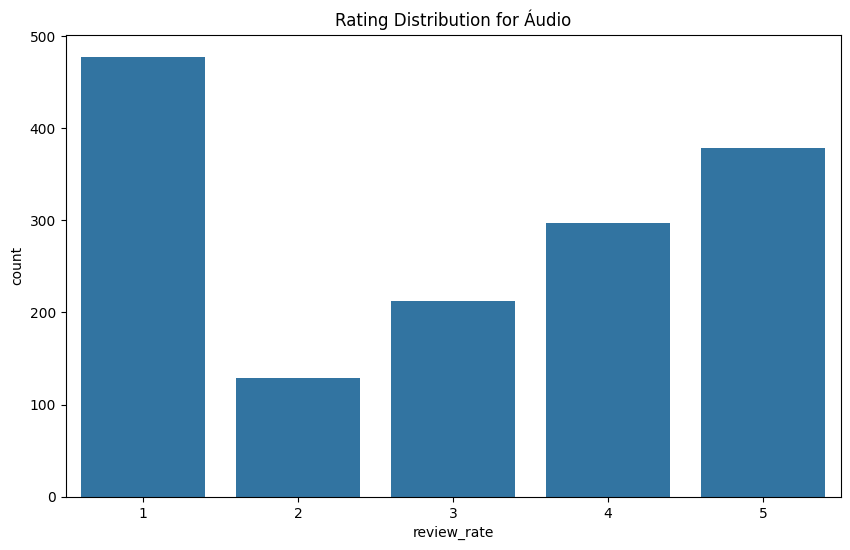

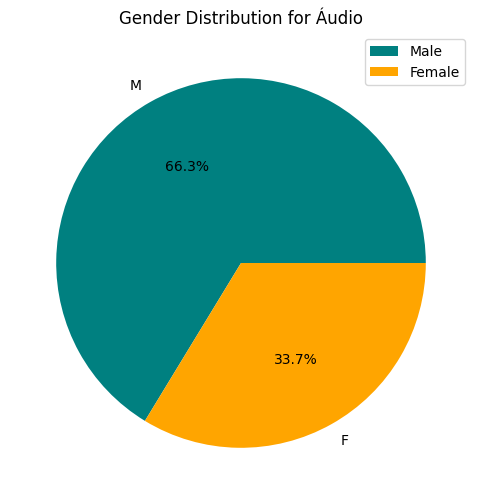


--- Analysis for category: Instrumentos Musicais ---
Number of reviews: 995
Average rating: 3.55

Top 5 products by number of reviews:
product_name
Microfone Sem Fio Profissional Vokal Vws20 Plus                                                  19
Caixa Som Portátil Amplificada Usb Mp3 Fm Sd Bluetooth                                           10
Microfone Condensador Com Tripe Para Gravaçao Profissional Para Pc E Notebook Preto (Mc40173)     8
Caixa de Som Multiuso Bluetooth, Led, Microfone                                                   8
Teclado Musical Yamaha Psr F51 61 Teclas Com Fonte + Suporte X ST200                              7
Name: count, dtype: int64


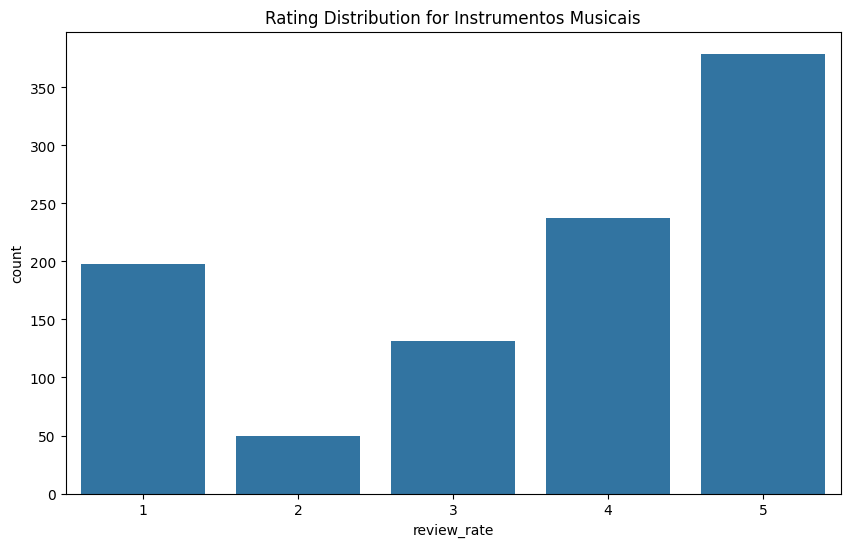

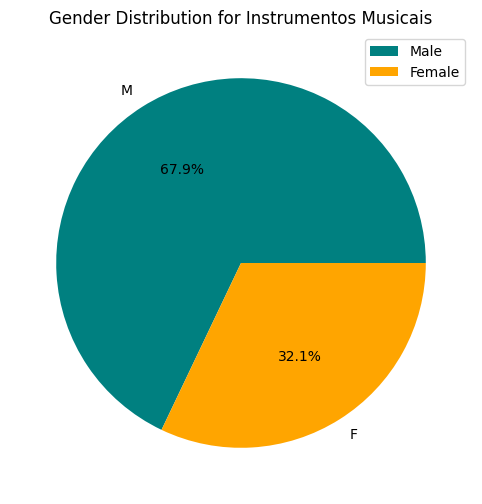


--- Analysis for category: Telefonia Fixa ---
Number of reviews: 453
Average rating: 3.28

Top 5 products by number of reviews:
product_name
Antena Interna Externa Digital Hd Veicular  E Terrestre Uhf Hdtv 360º                       24
Telefone sem Fio DECT 6.0 com Identificador de Chamadas - TS40ID Preto - Intelbras          23
Telefone Sem Fio Intelbras TS 3110 Preto                                                    19
Telefone Fixo Sem Fio Panasonic Dect 6.0 1,9 Ghz Kx-tgb110lbb Preto                         18
Telefone Sem Fio Elgin Tsf 8001 Dect 6.0 1.9 Ghz C/ Viva Voz E Identificador De Chamadas    16
Name: count, dtype: int64


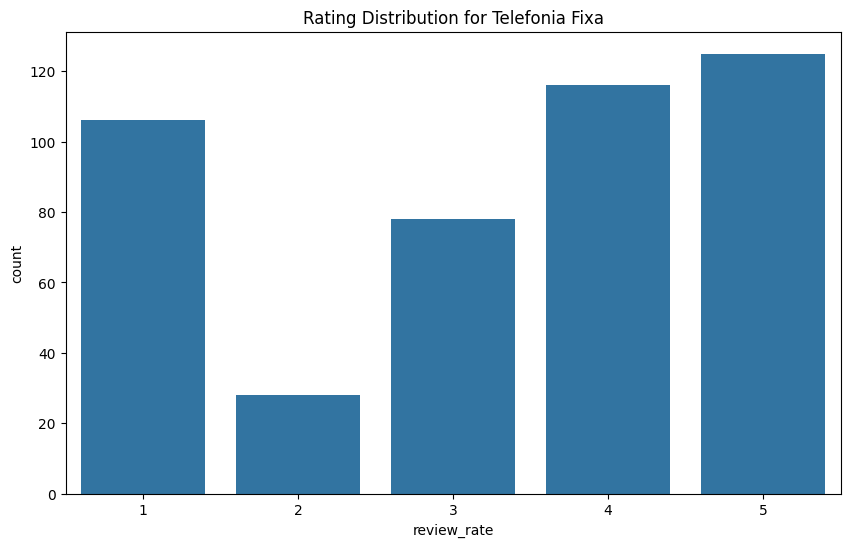

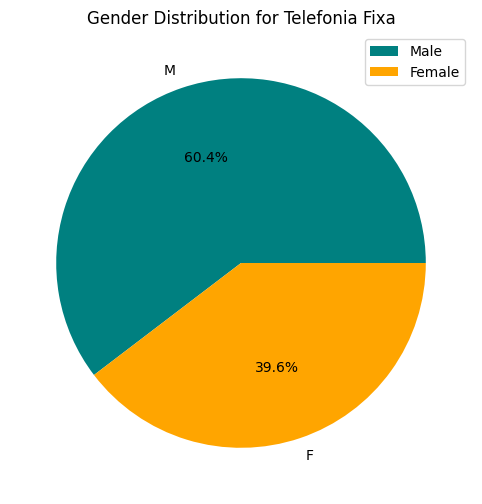


--- Analysis for category: Sinalização e Segurança ---
Number of reviews: 77
Average rating: 3.08

Top 5 products by number of reviews:
product_name
Walkie Talkie Ie Motorola MG160PA p/ Ate 18 KM com 14 Canais                   5
Lanterna Farolete Super Potente Forte Ótima Claridade                          2
Painel De Led, Letreiro Digital De 100cm X 20cm Alto Brilho Com Entrada Usb    2
Aparelho Choque Elétrico Carregador Luz Coldre 800kv Tw10                      2
Luva De Vinil Com Pó Talge                                                     1
Name: count, dtype: int64


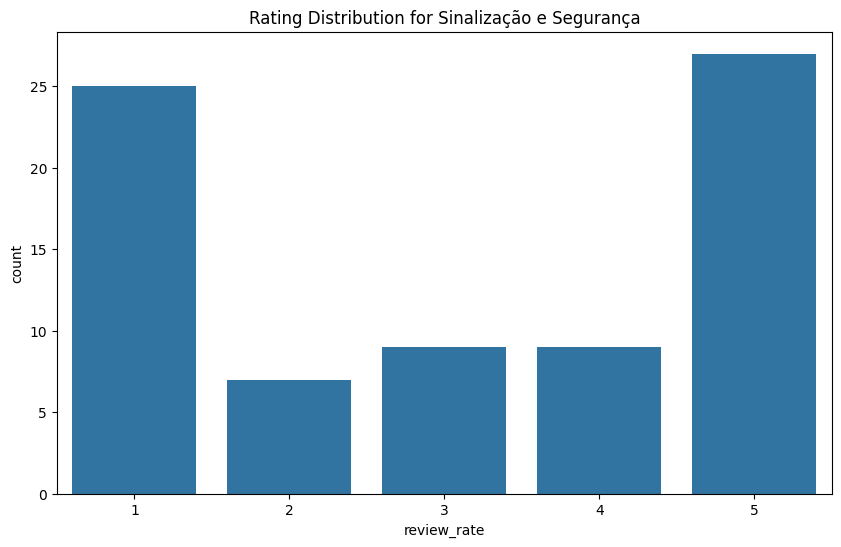

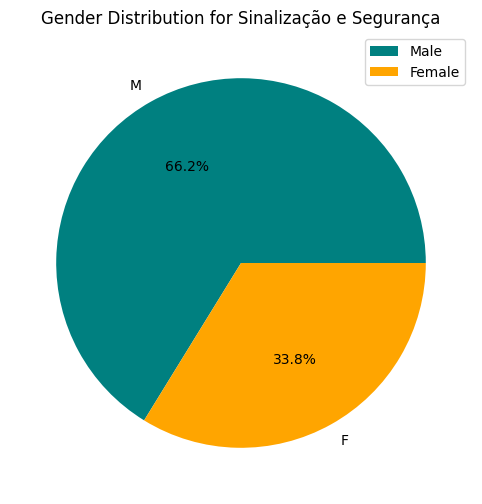


--- Analysis for category: Decoração ---
Number of reviews: 1467
Average rating: 3.40

Top 5 products by number of reviews:
product_name
Bandeja Esteira Para Braço De Sofá Com Porta Copos E Controle Caixote - Castanho    29
Fita Led Gesso C/ Controle E Fonte 3528 Rgb - 5 Metros                              16
Luminária Painel Plafon Led Quadrado Sobrepor - 18w - 6500k                         14
Pendente Track 1 Aço/Vidro Leitoso Branco - Startec                                 13
Pendente Meia Lua Meia Bola Esfera Alumínio 34cm - Vermelho                         12
Name: count, dtype: int64


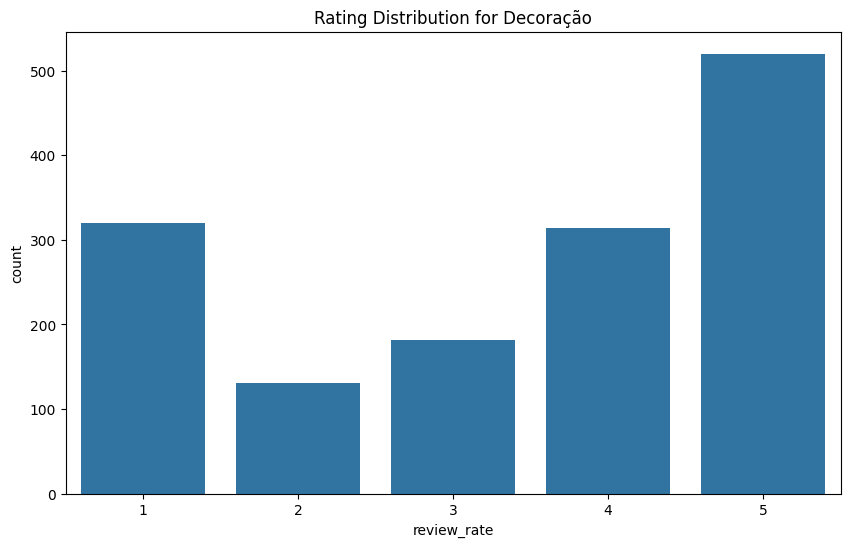

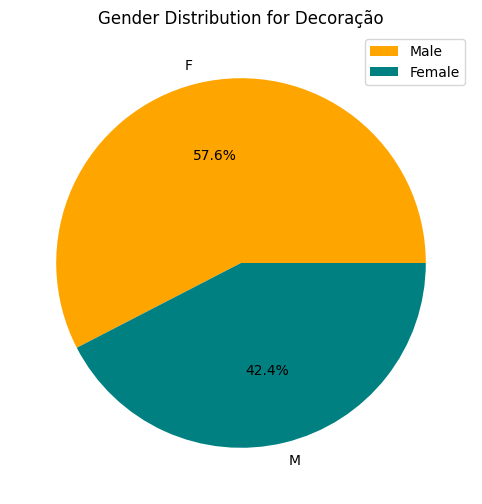


--- Analysis for category: Música ---
Number of reviews: 267
Average rating: 4.15

Top 5 products by number of reviews:
product_name
Deixe-me Viver - O Filme [DVD]              4
CD The Fifth Release From Matador           3
Pink Floyd Special Edition - 5 Dvds Rock    2
DVD Rihanna: Loud Tour Live At The 02       2
Dvd Portatil 7" Au710 Multilaser - Preto    2
Name: count, dtype: int64


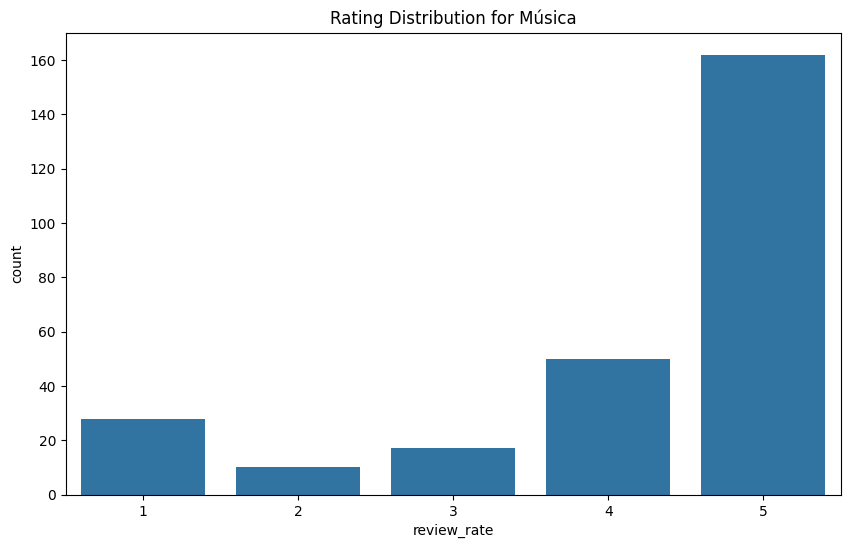

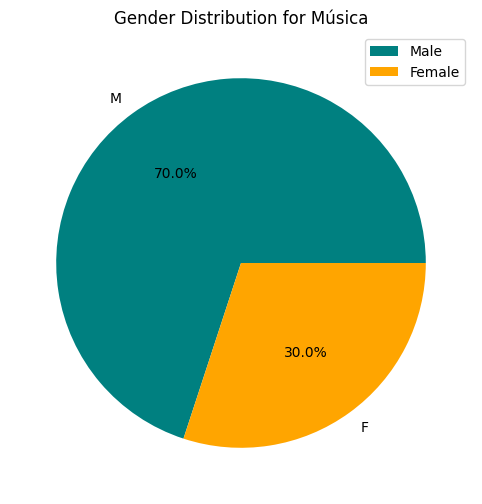


--- Analysis for category: Ar-condicionado e Aquecedores ---
Number of reviews: 775
Average rating: 3.47

Top 5 products by number of reviews:
product_name
Ar Condicionado Split Hi Wall Electrolux Ecoturbo 9000 Btus Frio R410          33
Ar Condicionado Split Hi-Wall Springer Midea 12.000 BTUs Frio 220V             30
Ar Condicionado Lg Split Inverter Libero E+ 9000 Btus Frio 220v Us-Q092wsg3    29
Ar Condicionado Split Hi-Wall LG Smart Inverter 11.500 BTUs Frio 220V          29
Ventilador de Coluna Oscilante 40cm 110V Preto - Fort                          19
Name: count, dtype: int64


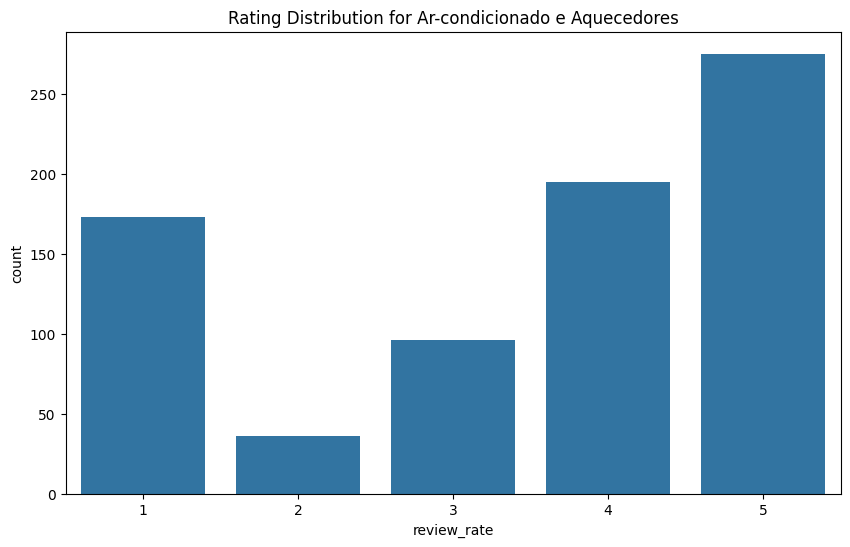

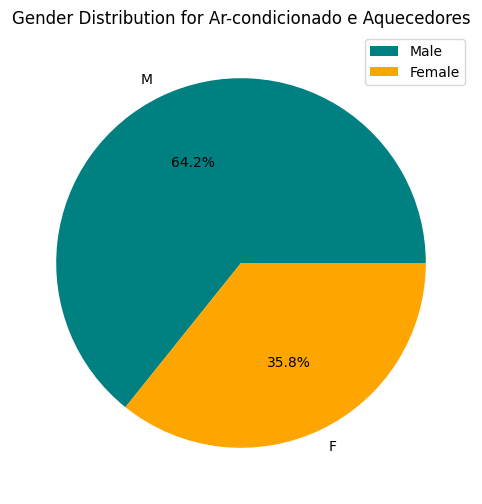


--- Analysis for category: Agro, Indústria e Comércio ---
Number of reviews: 310
Average rating: 2.86

Top 5 products by number of reviews:
product_name
Espremedor de laranja Inox 500w 3545RPM                               26
Arara Dupla De Roupas Altura Regulável Sapateira E Rodinhas           22
Liquidificador Industrial Alta Rotação 2 Litros Fak 800w Inox 110v    10
Balança Eletrônica Digital Alta Precisão Completa 40 Kg                8
Espremedor De Laranja Fak 500w 3545 Rpm Alumínio                       7
Name: count, dtype: int64


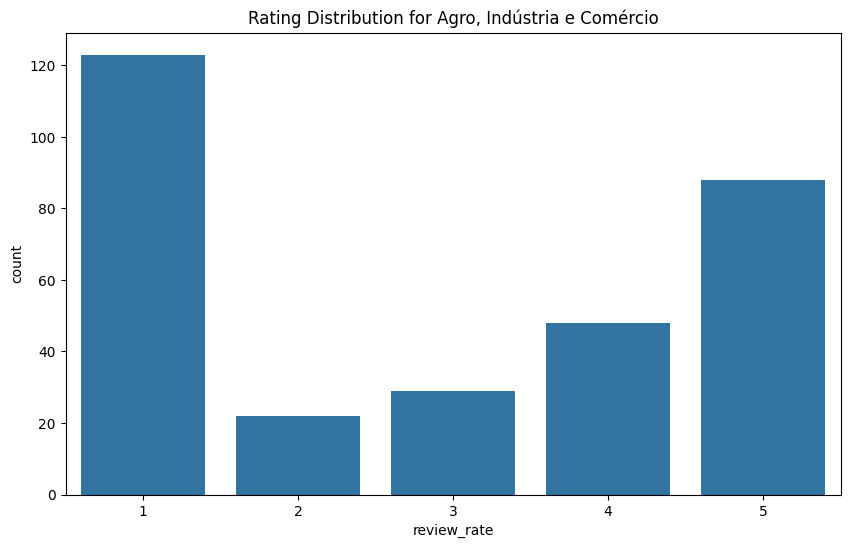

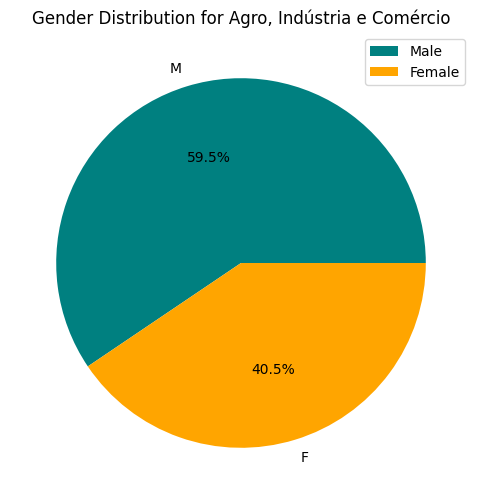


--- Analysis for category: Perfumaria ---
Number of reviews: 276
Average rating: 4.29

Top 5 products by number of reviews:
product_name
Deep Red Eau de Parfum Feminino 90ml - Hugo Boss    2
Name: count, dtype: int64


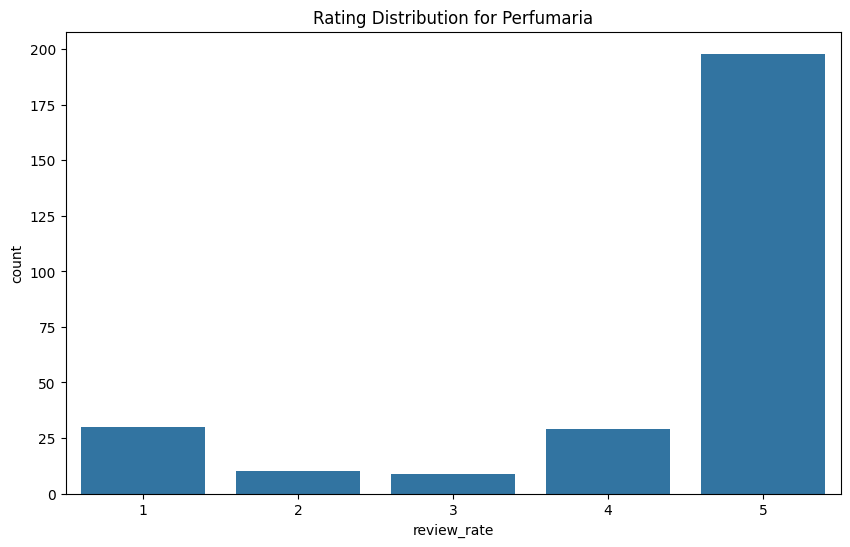

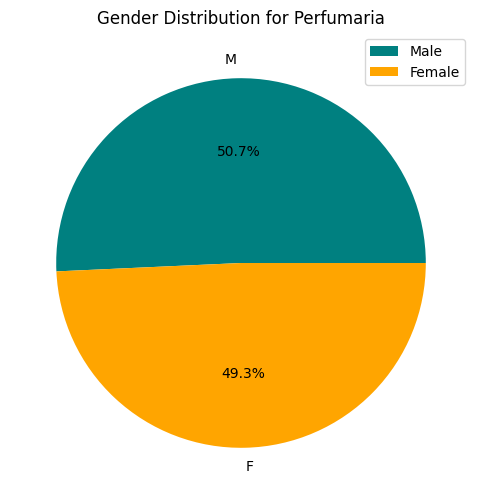


--- Analysis for category: Indústria, Comércio e Negócios ---
Number of reviews: 97
Average rating: 3.47

Top 5 products by number of reviews:
product_name
Pulverizador Costal Manual De Alavanca 20 Litros Pm P20 - Kawashima    4
Macaco Jacaré Portatil Até 02 Toneladas Com Maleta - Sparta            3
Chapa Sanduicheira P/ Lanches Grill Dog C/ Prensa 30x65cm A Gás        3
Triturador Trf-400f C/ Motor Bivolt 2cv Mono Trapp                     2
Podador De Altura Elétrico - 60hz - Pa75t - 110v                       2
Name: count, dtype: int64


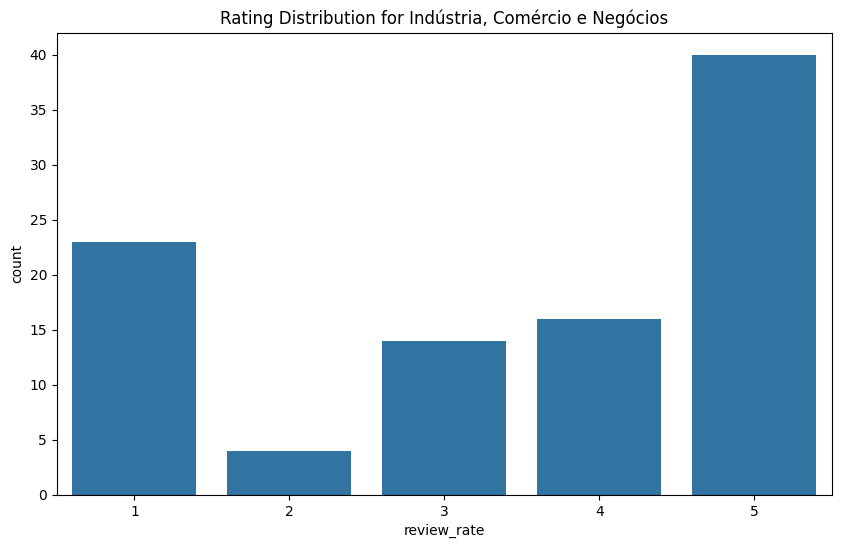

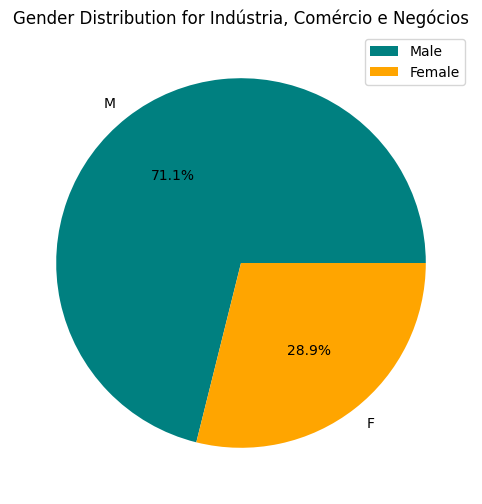


--- Analysis for category: nan ---
Number of reviews: 0
Average rating: nan

Top 5 products by number of reviews:
Series([], Name: count, dtype: int64)


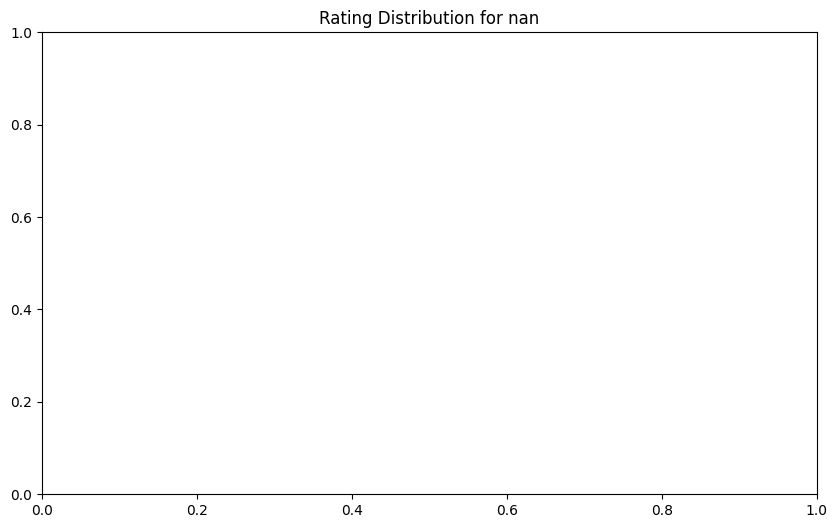

ValueError: Invalid color argument: []

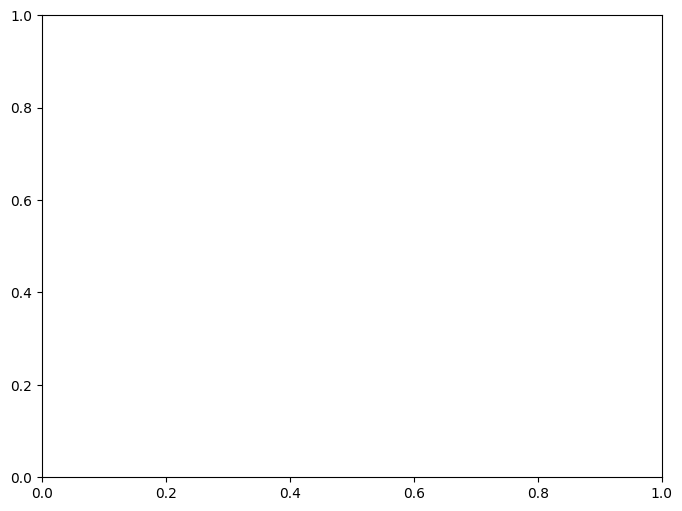

In [ ]:
# Function to analyze a specific category
def analyze_category(df, category):
    print(f"\n--- Analysis for category: {category} ---")
    
    # Filter data for the specific category
    cat_df = df[df['product_category_l1'] == category]
    
    # Basic stats
    print(f"Number of reviews: {len(cat_df)}")
    print(f"Average rating: {cat_df['review_rate'].mean():.2f}")
    # print(f"Recommendation rate: {cat_df['review_recommend_to_a_friend'].mean()*100:.2f}%")
    
    # Top 5 products by number of reviews
    top_products = cat_df['product_name'].value_counts().head()
    print("\nTop 5 products by number of reviews:")
    print(top_products)
    
    # Rating distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='review_rate', data=cat_df)
    plt.title(f'Rating Distribution for {category}')
    plt.show()
    
    # Gender distribution
    plt.figure(figsize=(8, 6))
    gender_counts = cat_df['reviewer_gender'].value_counts()
    colors = ['teal' if gender == 'M' else 'orange' for gender in gender_counts.index]
    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
    plt.title(f'Gender Distribution for {category}')
    plt.ylabel('')
    plt.legend(labels=['Male', 'Female'], loc='best')
    plt.show()
    
    ####  The state with the bigger number of reviews for every category is always SP
    ####  MG and RJ share 2 and 3 place changing from category to category
    # # Top 5 states
    # plt.figure(figsize=(10, 6))
    # cat_df['reviewer_brazilian_state'].value_counts().head().plot(kind='bar')
    # plt.title(f'Top 5 States for {category}')
    # plt.ylabel('Number of Reviews')
    # plt.show()

# Get unique categories
categories = df['product_category_l1'].unique()

# Analyze each category
for category in categories:
    analyze_category(df, category)


In [ ]:

# Overall category comparison
plt.figure(figsize=(12, 6))
df['product_category_l1'].value_counts().plot(kind='bar')
plt.title('Number of Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average rating by category
plt.figure(figsize=(12, 6))
df.groupby('product_category_l1')['review_rate'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Recommendation rate by category
plt.figure(figsize=(12, 6))
df.groupby('product_category_l1')['review_recommend_to_a_friend'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Recommendation Rate by Category')
plt.xlabel('Category')
plt.ylabel('Recommendation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()